In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score

In [3]:
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif,mutual_info_regression
from sklearn.feature_selection import SelectKBest,SelectPercentile

In [4]:
data=pd.read_csv('CM1.csv',nrows=10000)
data.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,2,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,3,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,4,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,5,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False


In [5]:
X=data.drop(['id','defects'],axis=1)
y=data['defects']

In [6]:
X.shape,y.shape

((498, 21), (498,))

In [7]:
X.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,163.15,1,0,6,0,15.0,15.0,44.0,19.0,9.0
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,191.55,0,0,3,0,16.0,8.0,31.0,16.0,7.0
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,333.31,0,0,3,0,16.0,12.0,46.0,26.0,11.0


In [8]:
y

0      False
1       True
2      False
3      False
4      False
       ...  
493     True
494     True
495     True
496     True
497     True
Name: defects, Length: 498, dtype: bool

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaling=MinMaxScaler()

In [11]:
scaling.fit_transform(X)

array([[2.36966825e-04, 4.21052632e-03, 1.37931034e-02, ...,
        1.58730159e-04, 1.47420147e-03, 2.48447205e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.22850123e-03, 0.00000000e+00],
       [5.45023697e-02, 4.21052632e-02, 0.00000000e+00, ...,
        3.41269841e-02, 2.33415233e-02, 4.96894410e-02],
       ...,
       [1.91943128e-01, 1.05263158e-01, 6.89655172e-02, ...,
        2.25396825e-01, 2.33415233e-01, 1.24223602e-01],
       [2.13270142e-02, 1.05263158e-02, 0.00000000e+00, ...,
        1.42857143e-02, 1.59705160e-02, 1.24223602e-02],
       [6.39810427e-02, 5.26315789e-02, 1.37931034e-01, ...,
        5.23809524e-02, 4.54545455e-02, 6.21118012e-02]])

In [12]:
new1_X = pd.DataFrame(scaling.fit_transform(X))
new1_X

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000237,0.004211,0.013793,0.006452,0.000145,0.000076,1.000000,0.010336,0.004427,6.036150e-07,...,0.000011,0.0250,0.005900,0.012195,1.0,0.002817,0.003822,0.000159,0.001474,0.002484
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000058,0.769231,0.007951,0.003405,4.643192e-07,...,0.000008,0.0125,0.002950,0.006098,0.5,0.000000,0.003185,0.000000,0.001229,0.000000
2,0.054502,0.042105,0.000000,0.032258,0.029894,0.018052,0.084615,0.075535,0.110801,1.363599e-03,...,0.001364,0.0125,0.000000,0.036585,0.0,0.197183,0.047771,0.034127,0.023342,0.049689
3,0.045024,0.031579,0.103448,0.016129,0.022179,0.012584,0.046154,0.127216,0.045866,1.600922e-03,...,0.001601,0.0000,0.000000,0.018293,0.0,0.211268,0.025478,0.023810,0.019656,0.037267
4,0.054502,0.052632,0.172414,0.016129,0.034233,0.020213,0.046154,0.137791,0.067999,2.785720e-03,...,0.002786,0.0000,0.000000,0.018293,0.0,0.211268,0.038217,0.035714,0.031941,0.062112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,0.109005,0.021053,0.000000,0.032258,0.122951,0.091319,0.030769,0.222629,0.190173,2.033064e-02,...,0.020331,0.0250,0.038348,0.012195,0.0,0.309859,0.146497,0.113492,0.137592,0.024845
494,0.054502,0.031579,0.068966,0.032258,0.051109,0.034316,0.038462,0.152103,0.104604,5.219682e-03,...,0.005220,0.0125,0.020649,0.024390,0.0,0.295775,0.073248,0.052381,0.049140,0.037267
495,0.191943,0.105263,0.068966,0.145161,0.228544,0.184290,0.015385,0.355490,0.240364,6.550813e-02,...,0.065508,0.1125,0.174041,0.213415,0.0,0.436620,0.216561,0.225397,0.233415,0.124224
496,0.021327,0.010526,0.000000,0.000000,0.014947,0.008783,0.115385,0.051682,0.078793,4.539603e-04,...,0.000454,0.0125,0.035398,0.024390,0.0,0.169014,0.041401,0.014286,0.015971,0.012422


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
standardScaling = StandardScaler()

In [15]:
standardScaling.fit_transform(new1_X)

array([[-0.66832969, -0.47755629, -0.29841641, ..., -0.64689624,
        -0.62579797, -0.52787083],
       [-0.67067103, -0.52552382, -0.40785041, ..., -0.64838012,
        -0.62809994, -0.5544364 ],
       [-0.13216334, -0.04584849, -0.40785041, ..., -0.32934638,
        -0.42092278, -0.02312486],
       ...,
       [ 1.22581255,  0.67366451,  0.13931959, ...,  1.45872639,
         1.54726022,  0.77384247],
       [-0.45995063, -0.40560499, -0.40785041, ..., -0.51483111,
        -0.48998184, -0.42160852],
       [-0.03850983,  0.07407035,  0.68648959, ..., -0.15870044,
        -0.21374563,  0.10970303]])

In [16]:
new2_X = pd.DataFrame(standardScaling.fit_transform(new1_X))
new2_X

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.668330,-0.477556,-0.298416,-0.389989,-0.646007,-0.532158,7.247750,-0.948668,-1.005309,-0.260268,...,-0.260103,-0.210250,-0.398530,-0.477629,19.935901,-1.457012,-0.715579,-0.646896,-0.625798,-0.527871
1,-0.670671,-0.525524,-0.407850,-0.463264,-0.647366,-0.532335,5.363055,-0.968256,-1.013426,-0.260270,...,-0.260144,-0.327896,-0.437286,-0.527725,9.937836,-1.477828,-0.721480,-0.648380,-0.628100,-0.554436
2,-0.132163,-0.045848,-0.407850,-0.096890,-0.366604,-0.349914,-0.228207,-0.413265,-0.160051,-0.238366,...,-0.238367,-0.327896,-0.476041,-0.277242,-0.060229,-0.020732,-0.308400,-0.329346,-0.420923,-0.023125
3,-0.225817,-0.165767,0.412905,-0.280077,-0.439059,-0.405352,-0.542323,0.011140,-0.676027,-0.234552,...,-0.234553,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.514940,-0.425798,-0.455452,-0.155953
4,-0.132163,0.074070,0.960075,-0.280077,-0.325849,-0.328009,-0.542323,0.097980,-0.500157,-0.215514,...,-0.215515,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.396917,-0.314508,-0.340354,0.109703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,0.406344,-0.285686,-0.407850,-0.096890,0.507380,0.392871,-0.667969,0.794657,0.470645,0.066410,...,0.066410,-0.210250,0.027783,-0.477629,-0.060229,0.811894,0.606277,0.412593,0.649493,-0.288781
494,-0.132163,-0.165767,0.139320,-0.096890,-0.167354,-0.185035,-0.605146,0.215508,-0.209295,-0.176404,...,-0.176404,-0.327896,-0.204751,-0.377435,-0.060229,0.707816,-0.072354,-0.158700,-0.179216,-0.155953
495,1.225813,0.673665,0.139320,1.185417,1.499103,1.335405,-0.793616,1.885705,0.869464,0.792355,...,0.792354,0.613269,1.810545,1.175562,-0.060229,1.748598,1.255403,1.458726,1.547260,0.773842
496,-0.459951,-0.405605,-0.407850,-0.463264,-0.506985,-0.443881,0.023086,-0.609144,-0.414386,-0.252983,...,-0.252983,-0.327896,-0.010973,-0.377435,-0.060229,-0.228889,-0.367411,-0.514831,-0.489982,-0.421609


In [17]:
X_train,X_test,y_train,y_test=train_test_split(new2_X,y,test_size=0.2,random_state=0,stratify=y)
X_train.shape,X_test.shape

((398, 21), (100, 21))

In [18]:
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter=constant_filter.transform(X_train)
X_test_filter=constant_filter.transform(X_test)

In [19]:
X_train_filter.shape,X_test_filter.shape

((398, 21), (100, 21))

In [20]:
X_train_T=X_train_filter.T
X_test_T=X_test_filter.T
X_train_T.shape,X_test_T.shape

((21, 398), (21, 100))

In [21]:
X_train_T=pd.DataFrame(X_train_T)
X_test_T=pd.DataFrame(X_test_T)

In [22]:
X_train_T.duplicated().sum()

0

In [23]:
X_train_unique=X_train_T.T
X_test_unique=X_test_T.T

In [24]:
### Mutual information -----------------------------------------------------------------------------------------------

In [45]:
mi=mutual_info_classif(X_train_unique,y_train)

In [46]:
mi

array([0.03193254, 0.0124277 , 0.00389409, 0.02386387, 0.02344224,
       0.04844647, 0.02939148, 0.02953268, 0.02905267, 0.03338203,
       0.04640054, 0.03338203, 0.02681218, 0.0469412 , 0.04720809,
       0.00176475, 0.04583194, 0.04224491, 0.01828359, 0.04669566,
       0.00499377])

In [47]:
len(mi)

21

In [48]:
mi=pd.Series(mi)
mi.index=X_train_unique.columns

In [49]:
mi.sort_values(ascending=False,inplace=True)
mi

5     0.048446
14    0.047208
13    0.046941
19    0.046696
10    0.046401
16    0.045832
17    0.042245
11    0.033382
9     0.033382
0     0.031933
7     0.029533
6     0.029391
8     0.029053
12    0.026812
3     0.023864
4     0.023442
18    0.018284
1     0.012428
20    0.004994
2     0.003894
15    0.001765
dtype: float64

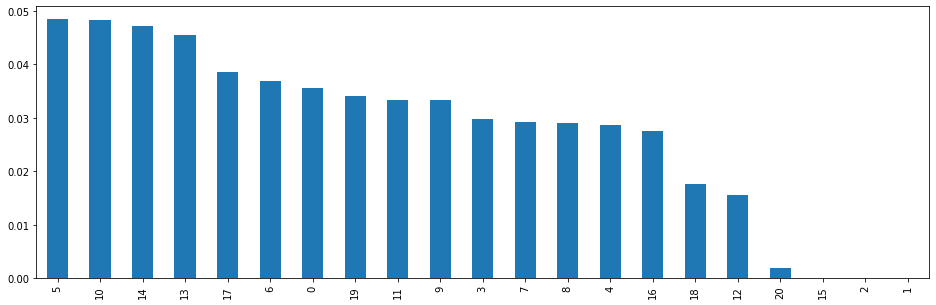

In [155]:
mi.plot.bar(figsize=(16,5))

In [51]:
sel=SelectPercentile(mutual_info_classif,percentile=20).fit(X_train_unique,y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([5, 10, 13, 14], dtype='int64')

In [52]:
len(X_train_unique.columns[sel.get_support()])

4

In [53]:
X_train_mi=sel.transform(X_train_unique)
X_test_mi=sel.transform(X_test_unique)

In [54]:
X_train_mi.shape,X_test_mi.shape

((398, 4), (100, 4))

In [55]:
new2_X

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.668330,-0.477556,-0.298416,-0.389989,-0.646007,-0.532158,7.247750,-0.948668,-1.005309,-0.260268,...,-0.260103,-0.210250,-0.398530,-0.477629,19.935901,-1.457012,-0.715579,-0.646896,-0.625798,-0.527871
1,-0.670671,-0.525524,-0.407850,-0.463264,-0.647366,-0.532335,5.363055,-0.968256,-1.013426,-0.260270,...,-0.260144,-0.327896,-0.437286,-0.527725,9.937836,-1.477828,-0.721480,-0.648380,-0.628100,-0.554436
2,-0.132163,-0.045848,-0.407850,-0.096890,-0.366604,-0.349914,-0.228207,-0.413265,-0.160051,-0.238366,...,-0.238367,-0.327896,-0.476041,-0.277242,-0.060229,-0.020732,-0.308400,-0.329346,-0.420923,-0.023125
3,-0.225817,-0.165767,0.412905,-0.280077,-0.439059,-0.405352,-0.542323,0.011140,-0.676027,-0.234552,...,-0.234553,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.514940,-0.425798,-0.455452,-0.155953
4,-0.132163,0.074070,0.960075,-0.280077,-0.325849,-0.328009,-0.542323,0.097980,-0.500157,-0.215514,...,-0.215515,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.396917,-0.314508,-0.340354,0.109703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,0.406344,-0.285686,-0.407850,-0.096890,0.507380,0.392871,-0.667969,0.794657,0.470645,0.066410,...,0.066410,-0.210250,0.027783,-0.477629,-0.060229,0.811894,0.606277,0.412593,0.649493,-0.288781
494,-0.132163,-0.165767,0.139320,-0.096890,-0.167354,-0.185035,-0.605146,0.215508,-0.209295,-0.176404,...,-0.176404,-0.327896,-0.204751,-0.377435,-0.060229,0.707816,-0.072354,-0.158700,-0.179216,-0.155953
495,1.225813,0.673665,0.139320,1.185417,1.499103,1.335405,-0.793616,1.885705,0.869464,0.792355,...,0.792354,0.613269,1.810545,1.175562,-0.060229,1.748598,1.255403,1.458726,1.547260,0.773842
496,-0.459951,-0.405605,-0.407850,-0.463264,-0.506985,-0.443881,0.023086,-0.609144,-0.414386,-0.252983,...,-0.252983,-0.327896,-0.010973,-0.377435,-0.060229,-0.228889,-0.367411,-0.514831,-0.489982,-0.421609


In [56]:
new3_X=new2_X.drop([0,1,2,3,4,6,7,8,9,11,12,15,16,17,18,19,20],axis=1)
new3_X

,5,10,13,14
0,-0.532158,1.760256,-0.398530,-0.477629
1,-0.532335,1.229686,-0.437286,-0.527725
2,-0.349914,-0.362023,-0.476041,-0.277242
3,-0.405352,-0.415080,-0.476041,-0.427532
4,-0.328009,-0.326652,-0.476041,-0.427532
...,...,...,...,...
493,0.392871,0.380774,0.027783,-0.477629
494,-0.185035,-0.185167,-0.204751,-0.377435
495,1.335405,1.318114,1.810545,1.175562
496,-0.443881,-0.450452,-0.010973,-0.377435


In [57]:
from sklearn.metrics import roc_auc_score, f1_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [58]:
clf=RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [59]:
X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(new3_X,y,test_size=0.2,random_state=101,stratify=y)
clf.fit(X_new_train, y_new_train)
y_pred = clf.predict(X_new_test)
print(classification_report(y_new_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.96      0.93        90
        True       0.33      0.20      0.25        10

    accuracy                           0.88       100
   macro avg       0.62      0.58      0.59       100
weighted avg       0.86      0.88      0.87       100



In [60]:
# If class imbalance is there micro is taken into consideration rather than macro

In [61]:
import array as arr

In [62]:
f1_mean_array = arr.array('d',[])

In [63]:
for x in range(10):
    scores = cross_val_score(clf, new3_X, y, cv=10, n_jobs=-1, scoring='f1_macro')
    f1_mean_array.append(scores.mean())

In [64]:
f1_mean_array

array('d', [0.506784919624977, 0.4925802732473127, 0.49380549095721965, 0.478609078087478, 0.5163285374418012, 0.5134342930251934, 0.4955217380968078, 0.4791689885018117, 0.5038537537713653, 0.4808599582818143])

In [65]:
sum = 0
for x in f1_mean_array:
    sum = sum + x
print (sum)

4.960947031035782


In [66]:
final_f1_score = sum/10
final_f1_score

0.49609470310357817

In [67]:
roc_mean_array = arr.array('d',[])

In [68]:
for x in range(10):
    scores_2 = cross_val_score(clf, new3_X, y, cv=10, n_jobs=-1, scoring='roc_auc')
    roc_mean_array.append(scores_2.mean())

In [69]:
roc_mean_array

array('d', [0.7262853535353535, 0.7393964646464646, 0.7172727272727273, 0.7124090909090909, 0.729840909090909, 0.7132222222222222, 0.7132058080808081, 0.7399785353535353, 0.7034469696969696, 0.7096868686868687])

In [70]:
sum = 0
for x in roc_mean_array:
    sum = sum + x
print (sum)

7.204744949494949


In [71]:
final_roc_score = sum/10
final_roc_score

0.7204744949494949

In [72]:
### Recursive feature elimination

In [73]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [74]:
from sklearn.feature_selection import RFE

In [77]:
def run_randomForest(X_train,X_test,y_train,y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs= -1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('f1_macro : ',f1_score(y_test,y_pred,average ='macro'))
    print('roc_auc : ',roc_auc_score(y_test,y_pred))

In [78]:
for index in range(1,21):
    selector = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs= -1),n_features_to_select= index, step=1)
    selector = selector.fit(X_train, y_train)
    X_train_rfe = selector.transform(X_train)
    X_test_rfe = selector.transform(X_test)
    print('Selected features: ',index)
    run_randomForest(X_train_rfe,X_test_rfe,y_train,y_test)
    print()

Selected features:  1
f1_macro :  0.6603260869565217
roc_auc :  0.6333333333333334

Selected features:  2
f1_macro :  0.6297819827231592
roc_auc :  0.5944444444444444

Selected features:  3
f1_macro :  0.5567375886524824
roc_auc :  0.5444444444444445

Selected features:  4
f1_macro :  0.6453900709219859
roc_auc :  0.6

Selected features:  5
f1_macro :  0.6297819827231592
roc_auc :  0.5944444444444444

Selected features:  6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


f1_macro :  0.4736842105263158
roc_auc :  0.5

Selected features:  7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


f1_macro :  0.4736842105263158
roc_auc :  0.5

Selected features:  8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


f1_macro :  0.4736842105263158
roc_auc :  0.5

Selected features:  9
f1_macro :  0.5670995670995671
roc_auc :  0.55

Selected features:  10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


f1_macro :  0.4736842105263158
roc_auc :  0.5

Selected features:  11
f1_macro :  0.47089947089947093
roc_auc :  0.49444444444444446

Selected features:  12
f1_macro :  0.47089947089947093
roc_auc :  0.49444444444444446

Selected features:  13
f1_macro :  0.5670995670995671
roc_auc :  0.55

Selected features:  14


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


f1_macro :  0.4736842105263158
roc_auc :  0.5

Selected features:  15
f1_macro :  0.5567375886524824
roc_auc :  0.5444444444444445

Selected features:  16
f1_macro :  0.5567375886524824
roc_auc :  0.5444444444444445

Selected features:  17


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


f1_macro :  0.4736842105263158
roc_auc :  0.5

Selected features:  18


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


f1_macro :  0.4736842105263158
roc_auc :  0.5

Selected features:  19
f1_macro :  0.5567375886524824
roc_auc :  0.5444444444444445

Selected features:  20
f1_macro :  0.6297819827231592
roc_auc :  0.5944444444444444



In [79]:
selector_2 = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs= -1), n_features_to_select=4, step=1)
selector_2 = selector_2.fit(X_train, y_train)

In [80]:
selector_2.support_

array([False, False, False, False, False,  True, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False])

In [81]:
selector_2.ranking_

array([ 5, 14, 17, 15,  2,  1, 16,  4,  1,  1, 13,  9, 12,  1,  3, 18,  8,
        6, 10,  7, 11])

In [82]:
selector_2.n_features_

4

In [83]:
selected_features = X_train.columns[selector_2.get_support()]
selected_features

Int64Index([5, 8, 9, 13], dtype='int64')

In [85]:
new4_X=new2_X.drop([0,1,2,3,4,6,7,10,11,12,14,15,16,17,18,19,20],axis=1)
new4_X

,5,8,9,13
0,-0.532158,-1.005309,-0.260268,-0.398530
1,-0.532335,-1.013426,-0.260270,-0.437286
2,-0.349914,-0.160051,-0.238366,-0.476041
3,-0.405352,-0.676027,-0.234552,-0.476041
4,-0.328009,-0.500157,-0.215514,-0.476041
...,...,...,...,...
493,0.392871,0.470645,0.066410,0.027783
494,-0.185035,-0.209295,-0.176404,-0.204751
495,1.335405,0.869464,0.792355,1.810545
496,-0.443881,-0.414386,-0.252983,-0.010973


In [86]:
clf=RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [87]:
X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(new4_X,y,test_size=0.2,random_state=101,stratify=y)
clf.fit(X_new_train, y_new_train)
y_pred = clf.predict(X_new_test)
print(classification_report(y_new_test, y_pred))

              precision    recall  f1-score   support

       False       0.90      0.94      0.92        90
        True       0.17      0.10      0.12        10

    accuracy                           0.86       100
   macro avg       0.54      0.52      0.52       100
weighted avg       0.83      0.86      0.84       100



In [88]:
f1_mean_array = arr.array('d',[])

In [89]:
for x in range(10):
    scores = cross_val_score(clf, new3_X, y, cv=10, n_jobs=-1, scoring='f1_macro')
    f1_mean_array.append(scores.mean())

In [90]:
f1_mean_array

array('d', [0.4945171279733733, 0.4803253252270661, 0.4821413148619612, 0.48446806261205, 0.4937245688883879, 0.4797409400003246, 0.4797533737285532, 0.511644473562045, 0.47723133122857336, 0.49399453600280435])

In [91]:
sum = 0
for x in f1_mean_array:
    sum = sum + x
print (sum)

4.877541054085139


In [92]:
final_f1_score = sum/10
final_f1_score

0.4877541054085139

In [93]:
roc_mean_array = arr.array('d',[])

In [94]:
for x in range(10):
    scores_2 = cross_val_score(clf, new3_X, y, cv=10, n_jobs=-1, scoring='roc_auc')
    roc_mean_array.append(scores_2.mean())

In [95]:
roc_mean_array

array('d', [0.7156527777777778, 0.7302739898989901, 0.7181982323232324, 0.7074191919191919, 0.7265328282828283, 0.7091805555555555, 0.7050782828282828, 0.7349015151515151, 0.6914330808080807, 0.7146818181818182])

In [96]:
sum = 0
for x in roc_mean_array:
    sum = sum + x
print (sum)

7.153352272727273


In [97]:
final_roc_score = sum/10
final_roc_score

0.7153352272727272

In [98]:
### Chi square -------------------------------------------------------------------------------------------------

In [99]:
data_2 = data.copy()
col_names = ['loc','v(g)','ev(g)','iv(g)','n','v','l','d','i','e','b','t','lOCode','lOComment','locCodeAndComment','lOBlank','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount']
features = data_2[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
data_2[col_names] = features
print(data_2)

      id       loc      v(g)     ev(g)     iv(g)         n         v  \
0      1 -0.668330 -0.477556 -0.298416 -0.389989 -0.646007 -0.532158   
1      2 -0.670671 -0.525524 -0.407850 -0.463264 -0.647366 -0.532335   
2      3 -0.132163 -0.045848 -0.407850 -0.096890 -0.366604 -0.349914   
3      4 -0.225817 -0.165767  0.412905 -0.280077 -0.439059 -0.405352   
4      5 -0.132163  0.074070  0.960075 -0.280077 -0.325849 -0.328009   
..   ...       ...       ...       ...       ...       ...       ...   
493  494  0.406344 -0.285686 -0.407850 -0.096890  0.507380  0.392871   
494  495 -0.132163 -0.165767  0.139320 -0.096890 -0.167354 -0.185035   
495  496  1.225813  0.673665  0.139320  1.185417  1.499103  1.335405   
496  497 -0.459951 -0.405605 -0.407850 -0.463264 -0.506985 -0.443881   
497  498 -0.038510  0.074070  0.686490  0.269483 -0.180939 -0.198829   

            l         d         i  ...    lOCode  lOComment   lOBlank  \
0    7.247750 -0.948668 -1.005309  ... -0.210250  -0.398530 -0

In [100]:
new_df = pd.DataFrame(data_2)
new_df

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1,-0.668330,-0.477556,-0.298416,-0.389989,-0.646007,-0.532158,7.247750,-0.948668,-1.005309,...,-0.210250,-0.398530,-0.477629,19.935901,-1.457012,-0.715579,-0.646896,-0.625798,-0.527871,False
1,2,-0.670671,-0.525524,-0.407850,-0.463264,-0.647366,-0.532335,5.363055,-0.968256,-1.013426,...,-0.327896,-0.437286,-0.527725,9.937836,-1.477828,-0.721480,-0.648380,-0.628100,-0.554436,True
2,3,-0.132163,-0.045848,-0.407850,-0.096890,-0.366604,-0.349914,-0.228207,-0.413265,-0.160051,...,-0.327896,-0.476041,-0.277242,-0.060229,-0.020732,-0.308400,-0.329346,-0.420923,-0.023125,False
3,4,-0.225817,-0.165767,0.412905,-0.280077,-0.439059,-0.405352,-0.542323,0.011140,-0.676027,...,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.514940,-0.425798,-0.455452,-0.155953,False
4,5,-0.132163,0.074070,0.960075,-0.280077,-0.325849,-0.328009,-0.542323,0.097980,-0.500157,...,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.396917,-0.314508,-0.340354,0.109703,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,494,0.406344,-0.285686,-0.407850,-0.096890,0.507380,0.392871,-0.667969,0.794657,0.470645,...,-0.210250,0.027783,-0.477629,-0.060229,0.811894,0.606277,0.412593,0.649493,-0.288781,True
494,495,-0.132163,-0.165767,0.139320,-0.096890,-0.167354,-0.185035,-0.605146,0.215508,-0.209295,...,-0.327896,-0.204751,-0.377435,-0.060229,0.707816,-0.072354,-0.158700,-0.179216,-0.155953,True
495,496,1.225813,0.673665,0.139320,1.185417,1.499103,1.335405,-0.793616,1.885705,0.869464,...,0.613269,1.810545,1.175562,-0.060229,1.748598,1.255403,1.458726,1.547260,0.773842,True
496,497,-0.459951,-0.405605,-0.407850,-0.463264,-0.506985,-0.443881,0.023086,-0.609144,-0.414386,...,-0.327896,-0.010973,-0.377435,-0.060229,-0.228889,-0.367411,-0.514831,-0.489982,-0.421609,True


In [101]:
data_3 = new_df.copy()
col_names = ['loc','v(g)','ev(g)','iv(g)','n','v','l','d','i','e','b','t','lOCode','lOComment','locCodeAndComment','lOBlank','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount']
data_4 = data_3[col_names]
Min_Max_scaler = StandardScaler().fit(data_4.values)
data_4 = Min_Max_scaler.transform(data_4.values)

In [102]:
data_3[col_names] = data_4

In [103]:
print (data_3)

      id       loc      v(g)     ev(g)     iv(g)         n         v  \
0      1 -0.668330 -0.477556 -0.298416 -0.389989 -0.646007 -0.532158   
1      2 -0.670671 -0.525524 -0.407850 -0.463264 -0.647366 -0.532335   
2      3 -0.132163 -0.045848 -0.407850 -0.096890 -0.366604 -0.349914   
3      4 -0.225817 -0.165767  0.412905 -0.280077 -0.439059 -0.405352   
4      5 -0.132163  0.074070  0.960075 -0.280077 -0.325849 -0.328009   
..   ...       ...       ...       ...       ...       ...       ...   
493  494  0.406344 -0.285686 -0.407850 -0.096890  0.507380  0.392871   
494  495 -0.132163 -0.165767  0.139320 -0.096890 -0.167354 -0.185035   
495  496  1.225813  0.673665  0.139320  1.185417  1.499103  1.335405   
496  497 -0.459951 -0.405605 -0.407850 -0.463264 -0.506985 -0.443881   
497  498 -0.038510  0.074070  0.686490  0.269483 -0.180939 -0.198829   

            l         d         i  ...    lOCode  lOComment   lOBlank  \
0    7.247750 -0.948668 -1.005309  ... -0.210250  -0.398530 -0

In [104]:
new_df2 = pd.DataFrame(data_3)
new_df2

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1,-0.668330,-0.477556,-0.298416,-0.389989,-0.646007,-0.532158,7.247750,-0.948668,-1.005309,...,-0.210250,-0.398530,-0.477629,19.935901,-1.457012,-0.715579,-0.646896,-0.625798,-0.527871,False
1,2,-0.670671,-0.525524,-0.407850,-0.463264,-0.647366,-0.532335,5.363055,-0.968256,-1.013426,...,-0.327896,-0.437286,-0.527725,9.937836,-1.477828,-0.721480,-0.648380,-0.628100,-0.554436,True
2,3,-0.132163,-0.045848,-0.407850,-0.096890,-0.366604,-0.349914,-0.228207,-0.413265,-0.160051,...,-0.327896,-0.476041,-0.277242,-0.060229,-0.020732,-0.308400,-0.329346,-0.420923,-0.023125,False
3,4,-0.225817,-0.165767,0.412905,-0.280077,-0.439059,-0.405352,-0.542323,0.011140,-0.676027,...,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.514940,-0.425798,-0.455452,-0.155953,False
4,5,-0.132163,0.074070,0.960075,-0.280077,-0.325849,-0.328009,-0.542323,0.097980,-0.500157,...,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.396917,-0.314508,-0.340354,0.109703,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,494,0.406344,-0.285686,-0.407850,-0.096890,0.507380,0.392871,-0.667969,0.794657,0.470645,...,-0.210250,0.027783,-0.477629,-0.060229,0.811894,0.606277,0.412593,0.649493,-0.288781,True
494,495,-0.132163,-0.165767,0.139320,-0.096890,-0.167354,-0.185035,-0.605146,0.215508,-0.209295,...,-0.327896,-0.204751,-0.377435,-0.060229,0.707816,-0.072354,-0.158700,-0.179216,-0.155953,True
495,496,1.225813,0.673665,0.139320,1.185417,1.499103,1.335405,-0.793616,1.885705,0.869464,...,0.613269,1.810545,1.175562,-0.060229,1.748598,1.255403,1.458726,1.547260,0.773842,True
496,497,-0.459951,-0.405605,-0.407850,-0.463264,-0.506985,-0.443881,0.023086,-0.609144,-0.414386,...,-0.327896,-0.010973,-0.377435,-0.060229,-0.228889,-0.367411,-0.514831,-0.489982,-0.421609,True


In [105]:
print(new_df2.loc[:,'defects'])

0      False
1       True
2      False
3      False
4      False
       ...  
493     True
494     True
495     True
496     True
497     True
Name: defects, Length: 498, dtype: bool


In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif

In [107]:
new_df2 = new_df2.abs()

In [108]:
X = new_df2.drop(['defects','id'], axis = 1)
y = new_df2['defects']

X.shape, y.shape

((498, 21), (498,))

In [109]:
y=y.astype('int')

In [110]:
y.shape

(498,)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

X_train.shape, X_test.shape

((348, 21), (150, 21))

In [128]:
f_score = chi2(X_train.fillna(0) , y_train)
f_score

(array([7.62317238e+00, 2.52309880e+00, 1.03774279e+00, 5.60515327e+00,
        5.35672916e+00, 6.00320428e+00, 3.97606526e-04, 1.64348820e+00,
        6.03876114e+00, 2.47074493e+00, 6.25165786e+00, 2.47065187e+00,
        1.43702324e-01, 1.97885087e+01, 7.39582280e+00, 9.83011342e+00,
        3.02070667e+00, 6.20188683e+00, 4.89419296e+00, 5.83758180e+00,
        1.94242894e+00]),
 array([5.76230346e-03, 1.12189925e-01, 3.08347021e-01, 1.79077284e-02,
        2.06424548e-02, 1.42799202e-02, 9.84091178e-01, 1.99847544e-01,
        1.39951018e-02, 1.15982944e-01, 1.24077125e-02, 1.15989811e-01,
        7.04627794e-01, 8.65011691e-06, 6.53755138e-03, 1.71677763e-03,
        8.22076368e-02, 1.27614201e-02, 2.69471656e-02, 1.56873725e-02,
        1.63405046e-01]))

In [129]:
pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns
sorted_rank = pvalues.sort_values(ascending=False)
sorted_rank

l                    0.984091
lOCode               0.704628
ev(g)                0.308347
d                    0.199848
branchCount          0.163405
t                    0.115990
e                    0.115983
v(g)                 0.112190
uniq_Op              0.082208
total_Op             0.026947
n                    0.020642
iv(g)                0.017908
total_Opnd           0.015687
v                    0.014280
i                    0.013995
uniq_Opnd            0.012761
b                    0.012408
lOBlank              0.006538
loc                  0.005762
locCodeAndComment    0.001717
lOComment            0.000009
dtype: float64

In [130]:
selected_features = SelectKBest(f_classif, k=8).fit(X_train, y_train)
f_features = X_train.columns[selected_features.get_support()]
f_features

Index(['loc', 'n', 'i', 'b', 'lOComment', 'lOBlank', 'uniq_Opnd',
       'total_Opnd'],
      dtype='object')

In [131]:
X_train_chisq = X_train.drop(labels = f_features, axis = 1)

In [132]:
X_train_chisq_final = X_train.drop(labels = X_train_chisq, axis = 1)

In [133]:
new_df4= X_train_chisq_final

In [134]:
new_df4

,loc,n,i,b,lOComment,lOBlank,uniq_Opnd,total_Opnd
46,0.506777,0.430002,0.339709,0.432766,0.359774,0.427532,0.573951,0.501492
336,0.413124,0.171882,0.256103,0.220538,0.12724,0.173628,0.249388,0.133177
168,0.296057,0.430002,0.504196,0.41508,0.12724,0.527725,0.249388,0.386393
219,0.459951,0.448116,0.470935,0.41508,0.321019,0.277242,0.455929,0.478472
303,0.0551437,0.0632005,0.190877,0.0967384,0.725385,0.524305,0.222703,0.0180783
...,...,...,...,...,...,...,...,...
101,0.24923,0.362076,0.224447,0.362023,0.437286,0.0734349,0.367411,0.374883
216,0.553604,0.525099,0.385706,0.468137,0.359774,0.427532,0.455929,0.524511
37,0.38971,0.384718,0.316711,0.362023,0.165996,0.173628,0.249388,0.351864
333,0.944852,0.955693,1.15708,0.787545,0.105294,0.674595,0.989852,0.937239


In [135]:
clf=RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [136]:
X_new_train,X_new_test,y_new_train,y_new_test = train_test_split(X, y, test_size=0.2,random_state= 101, stratify=y)
clf.fit(X_new_train, y_new_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [137]:
y_pred = clf.predict(X_new_test)
print(classification_report(y_new_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        90
           1       0.17      0.10      0.12        10

    accuracy                           0.86       100
   macro avg       0.54      0.52      0.52       100
weighted avg       0.83      0.86      0.84       100



In [138]:
f1_mean_array = arr.array('d',[])

In [139]:
for x in range(10):
    scores = cross_val_score(clf, new_df4, y_train, cv=10, n_jobs=-1, scoring='f1_macro')
    f1_mean_array.append(scores.mean())

In [140]:
f1_mean_array

array('d', [0.521787304735066, 0.5351289586009134, 0.5225774715480598, 0.5225774715480598, 0.5433215191671075, 0.5201691160147043, 0.5193532651988535, 0.5193532651988535, 0.5416900062002674, 0.5193532651988535])

In [141]:
sum = 0
for x in f1_mean_array:
    sum = sum + x
print (sum)

5.2653116434107385


In [142]:
final_f1_score = sum/10
final_f1_score

0.5265311643410738

In [143]:
roc_mean_array = arr.array('d',[])

In [144]:
for x in range(10):
    scores_2 = cross_val_score(clf, new_df4, y_train, cv=10, n_jobs=-1, scoring='roc_auc')
    roc_mean_array.append(scores_2.mean())

In [145]:
roc_mean_array

array('d', [0.7356770833333333, 0.7229922715053763, 0.7166876680107527, 0.7394867271505375, 0.7101646505376344, 0.7259618615591398, 0.7340137768817204, 0.7332913306451613, 0.7307123655913978, 0.7067666330645161])

In [146]:
sum = 0
for x in roc_mean_array:
    sum = sum + x
print (sum)

7.25575436827957


In [147]:
final_roc_score = sum/10
final_roc_score

0.725575436827957

In [148]:
### Correlation ------------------------------------------------------------------------------------------------------

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sb


import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import feature_selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
data = pd.read_csv('C:/Users/Haha/Desktop/Datasets/CM1.csv', nrows = 1500)
data.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,2,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,3,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,4,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,5,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False


In [4]:
data.shape

(498, 23)

In [5]:
from sklearn.preprocessing import MinMaxScaler

data_2 = data.copy()
col_names = ['loc','v(g)','ev(g)','iv(g)','n','v','l','d','i','e','b','t','lOCode','lOComment','locCodeAndComment','lOBlank','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount']
features = data_2[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
data_2[col_names] = features
print(data_2)

      id       loc      v(g)     ev(g)     iv(g)         n         v  \
0      1 -0.668330 -0.477556 -0.298416 -0.389989 -0.646007 -0.532158   
1      2 -0.670671 -0.525524 -0.407850 -0.463264 -0.647366 -0.532335   
2      3 -0.132163 -0.045848 -0.407850 -0.096890 -0.366604 -0.349914   
3      4 -0.225817 -0.165767  0.412905 -0.280077 -0.439059 -0.405352   
4      5 -0.132163  0.074070  0.960075 -0.280077 -0.325849 -0.328009   
..   ...       ...       ...       ...       ...       ...       ...   
493  494  0.406344 -0.285686 -0.407850 -0.096890  0.507380  0.392871   
494  495 -0.132163 -0.165767  0.139320 -0.096890 -0.167354 -0.185035   
495  496  1.225813  0.673665  0.139320  1.185417  1.499103  1.335405   
496  497 -0.459951 -0.405605 -0.407850 -0.463264 -0.506985 -0.443881   
497  498 -0.038510  0.074070  0.686490  0.269483 -0.180939 -0.198829   

            l         d         i  ...    lOCode  lOComment   lOBlank  \
0    7.247750 -0.948668 -1.005309  ... -0.210250  -0.398530 -0

In [6]:
new_df = pd.DataFrame(data_2)
new_df

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1,-0.668330,-0.477556,-0.298416,-0.389989,-0.646007,-0.532158,7.247750,-0.948668,-1.005309,...,-0.210250,-0.398530,-0.477629,19.935901,-1.457012,-0.715579,-0.646896,-0.625798,-0.527871,False
1,2,-0.670671,-0.525524,-0.407850,-0.463264,-0.647366,-0.532335,5.363055,-0.968256,-1.013426,...,-0.327896,-0.437286,-0.527725,9.937836,-1.477828,-0.721480,-0.648380,-0.628100,-0.554436,True
2,3,-0.132163,-0.045848,-0.407850,-0.096890,-0.366604,-0.349914,-0.228207,-0.413265,-0.160051,...,-0.327896,-0.476041,-0.277242,-0.060229,-0.020732,-0.308400,-0.329346,-0.420923,-0.023125,False
3,4,-0.225817,-0.165767,0.412905,-0.280077,-0.439059,-0.405352,-0.542323,0.011140,-0.676027,...,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.514940,-0.425798,-0.455452,-0.155953,False
4,5,-0.132163,0.074070,0.960075,-0.280077,-0.325849,-0.328009,-0.542323,0.097980,-0.500157,...,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.396917,-0.314508,-0.340354,0.109703,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,494,0.406344,-0.285686,-0.407850,-0.096890,0.507380,0.392871,-0.667969,0.794657,0.470645,...,-0.210250,0.027783,-0.477629,-0.060229,0.811894,0.606277,0.412593,0.649493,-0.288781,True
494,495,-0.132163,-0.165767,0.139320,-0.096890,-0.167354,-0.185035,-0.605146,0.215508,-0.209295,...,-0.327896,-0.204751,-0.377435,-0.060229,0.707816,-0.072354,-0.158700,-0.179216,-0.155953,True
495,496,1.225813,0.673665,0.139320,1.185417,1.499103,1.335405,-0.793616,1.885705,0.869464,...,0.613269,1.810545,1.175562,-0.060229,1.748598,1.255403,1.458726,1.547260,0.773842,True
496,497,-0.459951,-0.405605,-0.407850,-0.463264,-0.506985,-0.443881,0.023086,-0.609144,-0.414386,...,-0.327896,-0.010973,-0.377435,-0.060229,-0.228889,-0.367411,-0.514831,-0.489982,-0.421609,True


In [8]:
data_3 = new_df.copy()
col_names = ['loc','v(g)','ev(g)','iv(g)','n','v','l','d','i','e','b','t','lOCode','lOComment','locCodeAndComment','lOBlank','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount']
data_4 = data_3[col_names]
Min_Max_scaler = StandardScaler().fit(data_4.values)
data_4 = Min_Max_scaler.transform(data_4.values)

data_3[col_names] = data_4
print (data_3)

      id       loc      v(g)     ev(g)     iv(g)         n         v  \
0      1 -0.668330 -0.477556 -0.298416 -0.389989 -0.646007 -0.532158   
1      2 -0.670671 -0.525524 -0.407850 -0.463264 -0.647366 -0.532335   
2      3 -0.132163 -0.045848 -0.407850 -0.096890 -0.366604 -0.349914   
3      4 -0.225817 -0.165767  0.412905 -0.280077 -0.439059 -0.405352   
4      5 -0.132163  0.074070  0.960075 -0.280077 -0.325849 -0.328009   
..   ...       ...       ...       ...       ...       ...       ...   
493  494  0.406344 -0.285686 -0.407850 -0.096890  0.507380  0.392871   
494  495 -0.132163 -0.165767  0.139320 -0.096890 -0.167354 -0.185035   
495  496  1.225813  0.673665  0.139320  1.185417  1.499103  1.335405   
496  497 -0.459951 -0.405605 -0.407850 -0.463264 -0.506985 -0.443881   
497  498 -0.038510  0.074070  0.686490  0.269483 -0.180939 -0.198829   

            l         d         i  ...    lOCode  lOComment   lOBlank  \
0    7.247750 -0.948668 -1.005309  ... -0.210250  -0.398530 -0

In [9]:
new_df2 = pd.DataFrame(data_3)
new_df2

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1,-0.668330,-0.477556,-0.298416,-0.389989,-0.646007,-0.532158,7.247750,-0.948668,-1.005309,...,-0.210250,-0.398530,-0.477629,19.935901,-1.457012,-0.715579,-0.646896,-0.625798,-0.527871,False
1,2,-0.670671,-0.525524,-0.407850,-0.463264,-0.647366,-0.532335,5.363055,-0.968256,-1.013426,...,-0.327896,-0.437286,-0.527725,9.937836,-1.477828,-0.721480,-0.648380,-0.628100,-0.554436,True
2,3,-0.132163,-0.045848,-0.407850,-0.096890,-0.366604,-0.349914,-0.228207,-0.413265,-0.160051,...,-0.327896,-0.476041,-0.277242,-0.060229,-0.020732,-0.308400,-0.329346,-0.420923,-0.023125,False
3,4,-0.225817,-0.165767,0.412905,-0.280077,-0.439059,-0.405352,-0.542323,0.011140,-0.676027,...,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.514940,-0.425798,-0.455452,-0.155953,False
4,5,-0.132163,0.074070,0.960075,-0.280077,-0.325849,-0.328009,-0.542323,0.097980,-0.500157,...,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.396917,-0.314508,-0.340354,0.109703,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,494,0.406344,-0.285686,-0.407850,-0.096890,0.507380,0.392871,-0.667969,0.794657,0.470645,...,-0.210250,0.027783,-0.477629,-0.060229,0.811894,0.606277,0.412593,0.649493,-0.288781,True
494,495,-0.132163,-0.165767,0.139320,-0.096890,-0.167354,-0.185035,-0.605146,0.215508,-0.209295,...,-0.327896,-0.204751,-0.377435,-0.060229,0.707816,-0.072354,-0.158700,-0.179216,-0.155953,True
495,496,1.225813,0.673665,0.139320,1.185417,1.499103,1.335405,-0.793616,1.885705,0.869464,...,0.613269,1.810545,1.175562,-0.060229,1.748598,1.255403,1.458726,1.547260,0.773842,True
496,497,-0.459951,-0.405605,-0.407850,-0.463264,-0.506985,-0.443881,0.023086,-0.609144,-0.414386,...,-0.327896,-0.010973,-0.377435,-0.060229,-0.228889,-0.367411,-0.514831,-0.489982,-0.421609,True


In [10]:
X = new_df2.drop(['defects','id'], axis = 1)
y = new_df2['defects']

X.shape, y.shape

((498, 21), (498,))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

X_train_filter.shape, X_test_filter.shape

((398, 21), (100, 21))

In [12]:
#remove duplicate features
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [13]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

duplicated_features = X_train_T.duplicated()

features_to_keep = [not index for index in duplicated_features]

X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

X_train_unique = pd.DataFrame(X_train_unique)
X_test_unique = pd.DataFrame(X_test_unique)

X_train_unique.shape, X_test_unique.shape

((398, 21), (100, 21))

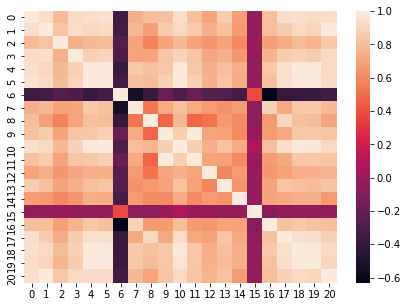

In [14]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('accuracy_score on test set: ')
    print(accuracy_score(y_test, y_pred))
    
corrmat = X_train_unique.corr()
plt.figure(figsize=(7,5))
sns.heatmap(corrmat)

In [15]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [16]:
corr_features = correlation(X_train_unique, 0.85)
len(set(corr_features))

14

In [17]:
corr_features

{1, 3, 4, 5, 7, 9, 10, 11, 13, 16, 17, 18, 19, 20}

In [18]:
X_train_uncorr = X_train_unique.drop(labels = corr_features, axis = 1)
X_test_uncorr = X_test_unique.drop(labels = corr_features, axis = 1)

X_train_uncorr.shape, X_test_uncorr.shape

((398, 7), (100, 7))

In [19]:
new_df3 = new_df2.drop(['id','loc','ev(g)','iv(g)','n','l','i','e','b','locCodeAndComment','lOBlank','uniq_Op','uniq_Opnd','total_Op','total_Opnd','defects'],axis=1)
new_df3

,v(g),v,d,t,lOCode,lOComment,branchCount
0,-0.477556,-0.532158,-0.948668,-0.260103,-0.210250,-0.398530,-0.527871
1,-0.525524,-0.532335,-0.968256,-0.260144,-0.327896,-0.437286,-0.554436
2,-0.045848,-0.349914,-0.413265,-0.238367,-0.327896,-0.476041,-0.023125
3,-0.165767,-0.405352,0.011140,-0.234553,-0.445541,-0.476041,-0.155953
4,0.074070,-0.328009,0.097980,-0.215515,-0.445541,-0.476041,0.109703
...,...,...,...,...,...,...,...
493,-0.285686,0.392871,0.794657,0.066410,-0.210250,0.027783,-0.288781
494,-0.165767,-0.185035,0.215508,-0.176404,-0.327896,-0.204751,-0.155953
495,0.673665,1.335405,1.885705,0.792354,0.613269,1.810545,0.773842
496,-0.405605,-0.443881,-0.609144,-0.252983,-0.327896,-0.010973,-0.421609


In [20]:
from sklearn.metrics import roc_auc_score, f1_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


In [21]:
clf=RandomForestClassifier(n_estimators=100,n_jobs=-1)


In [22]:
clf=RandomForestClassifier(n_estimators=100,n_jobs=-1)


In [24]:
import array as arr


In [25]:
f1_mean_array = arr.array('d',[])

for x in range(10):
    scores = cross_val_score(clf, new_df3, y, cv=10, n_jobs=-1, scoring='f1_macro')
    f1_mean_array.append(scores.mean())
    
f1_mean_array
   

array('d', [0.4861737448173167, 0.4843904809804459, 0.5163621397085978, 0.49733751996594994, 0.500336748364301, 0.48673365523165035, 0.48733194582994094, 0.4701750459524419, 0.4695894082918611, 0.4885019687172633])

In [26]:
sum = 0
for x in f1_mean_array:
    sum = sum + x
print (sum)

4.886932657859768


In [27]:
final_f1_score = sum/10
final_f1_score

0.4886932657859768

In [28]:
roc_mean_array = arr.array('d',[])

for x in range(10):
    scores_2 = cross_val_score(clf, new_df3, y, cv=10, n_jobs=-1, scoring='roc_auc')
    roc_mean_array.append(scores_2.mean())


In [29]:
roc_mean_array


array('d', [0.7121161616161615, 0.7190000000000001, 0.7037727272727272, 0.7066565656565656, 0.7126616161616162, 0.7082727272727273, 0.7119090909090909, 0.6978434343434344, 0.7280050505050506, 0.7208535353535355])

In [30]:
sum = 0
for x in roc_mean_array:
    sum = sum + x
print (sum)

7.12109090909091


In [31]:
final_roc_score = sum/10
final_roc_score

0.712109090909091

In [32]:
X_new_train,X_new_test,y_new_train,y_new_test = train_test_split(new_df3, y, test_size=0.2,random_state= 101, stratify=y)
clf.fit(X_new_train, y_new_train)
y_pred = clf.predict(X_new_test)
print(classification_report(y_new_test, y_pred))

              precision    recall  f1-score   support

       False       0.90      0.93      0.92        90
        True       0.14      0.10      0.12        10

    accuracy                           0.85       100
   macro avg       0.52      0.52      0.52       100
weighted avg       0.83      0.85      0.84       100



In [3]:
### Forward Feature Selection on CM1-------------------------------------------------------------------------------------------

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sb


import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import feature_selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [8]:
data = pd.read_csv('C:/Users/Faraz/Desktop/CM1.csv', nrows = 2000)
data.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,2,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,3,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,4,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,5,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

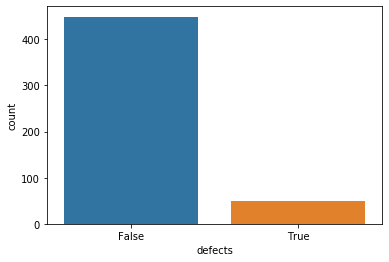

In [12]:
sb.countplot(data['defects'])

In [13]:
scaled_features = data.copy()
col_names = ['id','loc','v(g)','ev(g)','iv(g)','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','locCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
print(scaled_features)

           id       loc      v(g)     ev(g)     iv(g)         n         v  \
0   -1.728576 -0.668330 -0.477556 -0.298416 -0.389989 -0.646007 -0.532158   
1   -1.721620 -0.670671 -0.525524 -0.407850 -0.463264 -0.647366 -0.532335   
2   -1.714664 -0.132163 -0.045848 -0.407850 -0.096890 -0.366604 -0.349914   
3   -1.707708 -0.225817 -0.165767  0.412905 -0.280077 -0.439059 -0.405352   
4   -1.700752 -0.132163  0.074070  0.960075 -0.280077 -0.325849 -0.328009   
..        ...       ...       ...       ...       ...       ...       ...   
493  1.700752  0.406344 -0.285686 -0.407850 -0.096890  0.507380  0.392871   
494  1.707708 -0.132163 -0.165767  0.139320 -0.096890 -0.167354 -0.185035   
495  1.714664  1.225813  0.673665  0.139320  1.185417  1.499103  1.335405   
496  1.721620 -0.459951 -0.405605 -0.407850 -0.463264 -0.506985 -0.443881   
497  1.728576 -0.038510  0.074070  0.686490  0.269483 -0.180939 -0.198829   

            l         d         i  ...    lOCode  lOComment   lOBlank  \
0 

In [14]:
new_df = pd.DataFrame(scaled_features)
new_df

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,-1.728576,-0.668330,-0.477556,-0.298416,-0.389989,-0.646007,-0.532158,7.247750,-0.948668,-1.005309,...,-0.210250,-0.398530,-0.477629,19.935901,-1.457012,-0.715579,-0.646896,-0.625798,-0.527871,False
1,-1.721620,-0.670671,-0.525524,-0.407850,-0.463264,-0.647366,-0.532335,5.363055,-0.968256,-1.013426,...,-0.327896,-0.437286,-0.527725,9.937836,-1.477828,-0.721480,-0.648380,-0.628100,-0.554436,True
2,-1.714664,-0.132163,-0.045848,-0.407850,-0.096890,-0.366604,-0.349914,-0.228207,-0.413265,-0.160051,...,-0.327896,-0.476041,-0.277242,-0.060229,-0.020732,-0.308400,-0.329346,-0.420923,-0.023125,False
3,-1.707708,-0.225817,-0.165767,0.412905,-0.280077,-0.439059,-0.405352,-0.542323,0.011140,-0.676027,...,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.514940,-0.425798,-0.455452,-0.155953,False
4,-1.700752,-0.132163,0.074070,0.960075,-0.280077,-0.325849,-0.328009,-0.542323,0.097980,-0.500157,...,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.396917,-0.314508,-0.340354,0.109703,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1.700752,0.406344,-0.285686,-0.407850,-0.096890,0.507380,0.392871,-0.667969,0.794657,0.470645,...,-0.210250,0.027783,-0.477629,-0.060229,0.811894,0.606277,0.412593,0.649493,-0.288781,True
494,1.707708,-0.132163,-0.165767,0.139320,-0.096890,-0.167354,-0.185035,-0.605146,0.215508,-0.209295,...,-0.327896,-0.204751,-0.377435,-0.060229,0.707816,-0.072354,-0.158700,-0.179216,-0.155953,True
495,1.714664,1.225813,0.673665,0.139320,1.185417,1.499103,1.335405,-0.793616,1.885705,0.869464,...,0.613269,1.810545,1.175562,-0.060229,1.748598,1.255403,1.458726,1.547260,0.773842,True
496,1.721620,-0.459951,-0.405605,-0.407850,-0.463264,-0.506985,-0.443881,0.023086,-0.609144,-0.414386,...,-0.327896,-0.010973,-0.377435,-0.060229,-0.228889,-0.367411,-0.514831,-0.489982,-0.421609,True


In [15]:
MM_scaled_features = new_df.copy()
col_names = ['id','loc','v(g)','ev(g)','iv(g)','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','locCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount']
MM_features = MM_scaled_features[col_names]
Min_Max_scaler = StandardScaler().fit(MM_features.values)
MM_features = Min_Max_scaler.transform(MM_features.values)

In [16]:
print (MM_scaled_features)
MM_scaled_features[col_names] = MM_features

           id       loc      v(g)     ev(g)     iv(g)         n         v  \
0   -1.728576 -0.668330 -0.477556 -0.298416 -0.389989 -0.646007 -0.532158   
1   -1.721620 -0.670671 -0.525524 -0.407850 -0.463264 -0.647366 -0.532335   
2   -1.714664 -0.132163 -0.045848 -0.407850 -0.096890 -0.366604 -0.349914   
3   -1.707708 -0.225817 -0.165767  0.412905 -0.280077 -0.439059 -0.405352   
4   -1.700752 -0.132163  0.074070  0.960075 -0.280077 -0.325849 -0.328009   
..        ...       ...       ...       ...       ...       ...       ...   
493  1.700752  0.406344 -0.285686 -0.407850 -0.096890  0.507380  0.392871   
494  1.707708 -0.132163 -0.165767  0.139320 -0.096890 -0.167354 -0.185035   
495  1.714664  1.225813  0.673665  0.139320  1.185417  1.499103  1.335405   
496  1.721620 -0.459951 -0.405605 -0.407850 -0.463264 -0.506985 -0.443881   
497  1.728576 -0.038510  0.074070  0.686490  0.269483 -0.180939 -0.198829   

            l         d         i  ...    lOCode  lOComment   lOBlank  \
0 

In [17]:
new_df2 = pd.DataFrame(MM_scaled_features)
new_df2

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,-1.728576,-0.668330,-0.477556,-0.298416,-0.389989,-0.646007,-0.532158,7.247750,-0.948668,-1.005309,...,-0.210250,-0.398530,-0.477629,19.935901,-1.457012,-0.715579,-0.646896,-0.625798,-0.527871,False
1,-1.721620,-0.670671,-0.525524,-0.407850,-0.463264,-0.647366,-0.532335,5.363055,-0.968256,-1.013426,...,-0.327896,-0.437286,-0.527725,9.937836,-1.477828,-0.721480,-0.648380,-0.628100,-0.554436,True
2,-1.714664,-0.132163,-0.045848,-0.407850,-0.096890,-0.366604,-0.349914,-0.228207,-0.413265,-0.160051,...,-0.327896,-0.476041,-0.277242,-0.060229,-0.020732,-0.308400,-0.329346,-0.420923,-0.023125,False
3,-1.707708,-0.225817,-0.165767,0.412905,-0.280077,-0.439059,-0.405352,-0.542323,0.011140,-0.676027,...,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.514940,-0.425798,-0.455452,-0.155953,False
4,-1.700752,-0.132163,0.074070,0.960075,-0.280077,-0.325849,-0.328009,-0.542323,0.097980,-0.500157,...,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.396917,-0.314508,-0.340354,0.109703,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1.700752,0.406344,-0.285686,-0.407850,-0.096890,0.507380,0.392871,-0.667969,0.794657,0.470645,...,-0.210250,0.027783,-0.477629,-0.060229,0.811894,0.606277,0.412593,0.649493,-0.288781,True
494,1.707708,-0.132163,-0.165767,0.139320,-0.096890,-0.167354,-0.185035,-0.605146,0.215508,-0.209295,...,-0.327896,-0.204751,-0.377435,-0.060229,0.707816,-0.072354,-0.158700,-0.179216,-0.155953,True
495,1.714664,1.225813,0.673665,0.139320,1.185417,1.499103,1.335405,-0.793616,1.885705,0.869464,...,0.613269,1.810545,1.175562,-0.060229,1.748598,1.255403,1.458726,1.547260,0.773842,True
496,1.721620,-0.459951,-0.405605,-0.407850,-0.463264,-0.506985,-0.443881,0.023086,-0.609144,-0.414386,...,-0.327896,-0.010973,-0.377435,-0.060229,-0.228889,-0.367411,-0.514831,-0.489982,-0.421609,True


In [18]:
X = new_df2.drop(['defects','id'], axis = 1)
y = new_df2['defects']

X.shape, y.shape

((498, 21), (498,))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape

((398, 21), (100, 21))

In [20]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [21]:
new_df2.keys()

Index(['id', 'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e',
       'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
       'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount',
       'defects'],
      dtype='object')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape

((398, 21), (100, 21))

In [25]:
sfs = SFS(RandomForestClassifier(n_estimators=100, n_jobs = 4),
           k_features=4,
           forward=True,
           floating=False,
           verbose = 2,
           scoring = 'roc_auc',
           cv = 5,
           n_jobs = 4
         ).fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  21 out of  21 | elapsed:    7.6s finished

[2020-06-12 16:49:52] Features: 1/4 -- score: 0.7522265537670468[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    7.1s finished

[2020-06-12 16:49:59] Features: 2/4 -- score: 0.8194877598926895[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  19 out of  19 | elapsed:    7.0s finished

[2020-06-12 16:50:06] Features: 3/4 -- score: 0.83116336910351[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:    7.1s finished

[2020-06-12 16:50:13] Features: 4/4 -- score: 0.8368603985021238

In [26]:
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
print(selected_features)

Index(['v(g)', 'v', 'lOCode', 'locCodeAndComment'], dtype='object')


In [27]:
print(sfs.k_score_)

0.8368603985021238


In [28]:
sfs.k_feature_idx_

(1, 5, 12, 15)

In [29]:
sfs.k_feature_names_

('v(g)', 'v', 'lOCode', 'locCodeAndComment')

In [30]:
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

In [31]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(5,)","[0.6744791666666667, 0.8446180555555556, 0.690...",0.752227,"(v,)",0.0803748,0.0625343,0.0312672
2,"(5, 12)","[0.8932291666666666, 0.8680555555555556, 0.760...",0.819488,"(v, lOCode)",0.0773691,0.0601958,0.0300979
3,"(5, 12, 15)","[0.8793402777777778, 0.915798611111111, 0.7690...",0.831163,"(v, lOCode, locCodeAndComment)",0.0763829,0.0594285,0.0297143
4,"(1, 5, 12, 15)","[0.9262152777777778, 0.9001736111111112, 0.756...",0.83686,"(v(g), v, lOCode, locCodeAndComment)",0.0925773,0.0720283,0.0360141


In [32]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

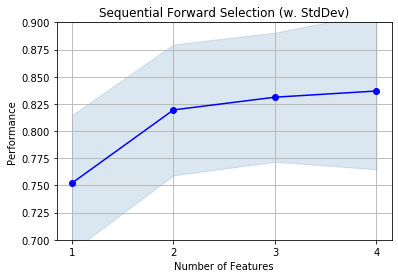

In [33]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.7, 0.9])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [35]:
new_df3 = new_df2.drop(['id','loc','ev(g)','iv(g)','n','l','d','i','e','b','t','lOComment','lOBlank','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','defects'], axis = 1)
new_df3

,v(g),v,lOCode,locCodeAndComment
0,-0.477556,-0.532158,-0.210250,19.935901
1,-0.525524,-0.532335,-0.327896,9.937836
2,-0.045848,-0.349914,-0.327896,-0.060229
3,-0.165767,-0.405352,-0.445541,-0.060229
4,0.074070,-0.328009,-0.445541,-0.060229
...,...,...,...,...
493,-0.285686,0.392871,-0.210250,-0.060229
494,-0.165767,-0.185035,-0.327896,-0.060229
495,0.673665,1.335405,0.613269,-0.060229
496,-0.405605,-0.443881,-0.327896,-0.060229


In [36]:
clf=RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [39]:
import array as arr

In [40]:
f1_mean_array = arr.array('d',[])

In [42]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [43]:
for x in range(10):
    scores = cross_val_score(clf, new_df3, y, cv=10, n_jobs=-1, scoring='f1_macro')
    f1_mean_array.append(scores.mean())

In [44]:
f1_mean_array

array('d', [0.5826500458168143, 0.5611468747995011, 0.5862203020652956, 0.5459869778263464, 0.5631210479693264, 0.5625611375549926, 0.5631330890535057, 0.566039370191581, 0.5602027257470719, 0.5535004907839672])

In [45]:
sum = 0
for x in f1_mean_array:
    sum = sum + x
print (sum)

5.644562061808402


In [46]:
final_f1_score = sum/10
final_f1_score

0.5644562061808401

In [47]:
roc_mean_array = arr.array('d',[])

In [48]:
for x in range(10):
    scores_2 = cross_val_score(clf, new_df3, y, cv=10, n_jobs=-1, scoring='roc_auc')
    roc_mean_array.append(scores_2.mean())

In [49]:
roc_mean_array

array('d', [0.7428737373737374, 0.7556805555555556, 0.7448535353535355, 0.7417171717171718, 0.7491742424242424, 0.7449633838383838, 0.7569886363636363, 0.7502007575757575, 0.7642007575757576, 0.7420744949494951])

In [50]:
sum = 0
for x in roc_mean_array:
    sum = sum + x
print (sum)

7.492727272727272


In [51]:
final_roc_score = sum/10
final_roc_score

0.7492727272727272

In [53]:
from sklearn.metrics import classification_report
X_new_train,X_new_test,y_new_train,y_new_test = train_test_split(new_df3, y, test_size=0.2,random_state= 101, stratify=y)
clf.fit(X_new_train, y_new_train)
y_pred = clf.predict(X_new_test)
print(classification_report(y_new_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.90      0.91        90
        True       0.18      0.20      0.19        10

    accuracy                           0.83       100
   macro avg       0.55      0.55      0.55       100
weighted avg       0.84      0.83      0.83       100



In [54]:
### Backward Feature Selection on CM1------------------------------------------------------------------------------------------

In [55]:
scaled_features = data.copy()
col_names = ['id','loc','v(g)','ev(g)','iv(g)','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','locCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
print(scaled_features)

           id       loc      v(g)     ev(g)     iv(g)         n         v  \
0   -1.728576 -0.668330 -0.477556 -0.298416 -0.389989 -0.646007 -0.532158   
1   -1.721620 -0.670671 -0.525524 -0.407850 -0.463264 -0.647366 -0.532335   
2   -1.714664 -0.132163 -0.045848 -0.407850 -0.096890 -0.366604 -0.349914   
3   -1.707708 -0.225817 -0.165767  0.412905 -0.280077 -0.439059 -0.405352   
4   -1.700752 -0.132163  0.074070  0.960075 -0.280077 -0.325849 -0.328009   
..        ...       ...       ...       ...       ...       ...       ...   
493  1.700752  0.406344 -0.285686 -0.407850 -0.096890  0.507380  0.392871   
494  1.707708 -0.132163 -0.165767  0.139320 -0.096890 -0.167354 -0.185035   
495  1.714664  1.225813  0.673665  0.139320  1.185417  1.499103  1.335405   
496  1.721620 -0.459951 -0.405605 -0.407850 -0.463264 -0.506985 -0.443881   
497  1.728576 -0.038510  0.074070  0.686490  0.269483 -0.180939 -0.198829   

            l         d         i  ...    lOCode  lOComment   lOBlank  \
0 

In [56]:
new_df = pd.DataFrame(scaled_features)
new_df

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,-1.728576,-0.668330,-0.477556,-0.298416,-0.389989,-0.646007,-0.532158,7.247750,-0.948668,-1.005309,...,-0.210250,-0.398530,-0.477629,19.935901,-1.457012,-0.715579,-0.646896,-0.625798,-0.527871,False
1,-1.721620,-0.670671,-0.525524,-0.407850,-0.463264,-0.647366,-0.532335,5.363055,-0.968256,-1.013426,...,-0.327896,-0.437286,-0.527725,9.937836,-1.477828,-0.721480,-0.648380,-0.628100,-0.554436,True
2,-1.714664,-0.132163,-0.045848,-0.407850,-0.096890,-0.366604,-0.349914,-0.228207,-0.413265,-0.160051,...,-0.327896,-0.476041,-0.277242,-0.060229,-0.020732,-0.308400,-0.329346,-0.420923,-0.023125,False
3,-1.707708,-0.225817,-0.165767,0.412905,-0.280077,-0.439059,-0.405352,-0.542323,0.011140,-0.676027,...,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.514940,-0.425798,-0.455452,-0.155953,False
4,-1.700752,-0.132163,0.074070,0.960075,-0.280077,-0.325849,-0.328009,-0.542323,0.097980,-0.500157,...,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.396917,-0.314508,-0.340354,0.109703,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1.700752,0.406344,-0.285686,-0.407850,-0.096890,0.507380,0.392871,-0.667969,0.794657,0.470645,...,-0.210250,0.027783,-0.477629,-0.060229,0.811894,0.606277,0.412593,0.649493,-0.288781,True
494,1.707708,-0.132163,-0.165767,0.139320,-0.096890,-0.167354,-0.185035,-0.605146,0.215508,-0.209295,...,-0.327896,-0.204751,-0.377435,-0.060229,0.707816,-0.072354,-0.158700,-0.179216,-0.155953,True
495,1.714664,1.225813,0.673665,0.139320,1.185417,1.499103,1.335405,-0.793616,1.885705,0.869464,...,0.613269,1.810545,1.175562,-0.060229,1.748598,1.255403,1.458726,1.547260,0.773842,True
496,1.721620,-0.459951,-0.405605,-0.407850,-0.463264,-0.506985,-0.443881,0.023086,-0.609144,-0.414386,...,-0.327896,-0.010973,-0.377435,-0.060229,-0.228889,-0.367411,-0.514831,-0.489982,-0.421609,True


In [57]:
MM_scaled_features = new_df.copy()
col_names = ['id','loc','v(g)','ev(g)','iv(g)','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','locCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount']
MM_features = MM_scaled_features[col_names]
Min_Max_scaler = StandardScaler().fit(MM_features.values)
MM_features = Min_Max_scaler.transform(MM_features.values)

In [58]:
print (MM_scaled_features)
MM_scaled_features[col_names] = MM_features

           id       loc      v(g)     ev(g)     iv(g)         n         v  \
0   -1.728576 -0.668330 -0.477556 -0.298416 -0.389989 -0.646007 -0.532158   
1   -1.721620 -0.670671 -0.525524 -0.407850 -0.463264 -0.647366 -0.532335   
2   -1.714664 -0.132163 -0.045848 -0.407850 -0.096890 -0.366604 -0.349914   
3   -1.707708 -0.225817 -0.165767  0.412905 -0.280077 -0.439059 -0.405352   
4   -1.700752 -0.132163  0.074070  0.960075 -0.280077 -0.325849 -0.328009   
..        ...       ...       ...       ...       ...       ...       ...   
493  1.700752  0.406344 -0.285686 -0.407850 -0.096890  0.507380  0.392871   
494  1.707708 -0.132163 -0.165767  0.139320 -0.096890 -0.167354 -0.185035   
495  1.714664  1.225813  0.673665  0.139320  1.185417  1.499103  1.335405   
496  1.721620 -0.459951 -0.405605 -0.407850 -0.463264 -0.506985 -0.443881   
497  1.728576 -0.038510  0.074070  0.686490  0.269483 -0.180939 -0.198829   

            l         d         i  ...    lOCode  lOComment   lOBlank  \
0 

In [59]:
new_df2 = pd.DataFrame(MM_scaled_features)
new_df2

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,-1.728576,-0.668330,-0.477556,-0.298416,-0.389989,-0.646007,-0.532158,7.247750,-0.948668,-1.005309,...,-0.210250,-0.398530,-0.477629,19.935901,-1.457012,-0.715579,-0.646896,-0.625798,-0.527871,False
1,-1.721620,-0.670671,-0.525524,-0.407850,-0.463264,-0.647366,-0.532335,5.363055,-0.968256,-1.013426,...,-0.327896,-0.437286,-0.527725,9.937836,-1.477828,-0.721480,-0.648380,-0.628100,-0.554436,True
2,-1.714664,-0.132163,-0.045848,-0.407850,-0.096890,-0.366604,-0.349914,-0.228207,-0.413265,-0.160051,...,-0.327896,-0.476041,-0.277242,-0.060229,-0.020732,-0.308400,-0.329346,-0.420923,-0.023125,False
3,-1.707708,-0.225817,-0.165767,0.412905,-0.280077,-0.439059,-0.405352,-0.542323,0.011140,-0.676027,...,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.514940,-0.425798,-0.455452,-0.155953,False
4,-1.700752,-0.132163,0.074070,0.960075,-0.280077,-0.325849,-0.328009,-0.542323,0.097980,-0.500157,...,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.396917,-0.314508,-0.340354,0.109703,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,1.700752,0.406344,-0.285686,-0.407850,-0.096890,0.507380,0.392871,-0.667969,0.794657,0.470645,...,-0.210250,0.027783,-0.477629,-0.060229,0.811894,0.606277,0.412593,0.649493,-0.288781,True
494,1.707708,-0.132163,-0.165767,0.139320,-0.096890,-0.167354,-0.185035,-0.605146,0.215508,-0.209295,...,-0.327896,-0.204751,-0.377435,-0.060229,0.707816,-0.072354,-0.158700,-0.179216,-0.155953,True
495,1.714664,1.225813,0.673665,0.139320,1.185417,1.499103,1.335405,-0.793616,1.885705,0.869464,...,0.613269,1.810545,1.175562,-0.060229,1.748598,1.255403,1.458726,1.547260,0.773842,True
496,1.721620,-0.459951,-0.405605,-0.407850,-0.463264,-0.506985,-0.443881,0.023086,-0.609144,-0.414386,...,-0.327896,-0.010973,-0.377435,-0.060229,-0.228889,-0.367411,-0.514831,-0.489982,-0.421609,True


In [60]:
X = new_df2.drop(['defects','id'], axis = 1)
y = new_df2['defects']

X.shape, y.shape

((498, 21), (498,))

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape

((398, 21), (100, 21))

In [62]:
new_df2.keys()

Index(['id', 'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e',
       'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
       'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount',
       'defects'],
      dtype='object')

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape

((398, 21), (100, 21))

In [67]:
sfs = SFS(RandomForestClassifier(n_estimators=100, n_jobs = 4),
           k_features=9,
           forward=False,
           floating=False,
           verbose = 2,
           scoring = 'roc_auc',
           cv = 5,
           n_jobs = 4
         ).fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  21 out of  21 | elapsed:    8.3s finished

[2020-06-12 17:03:04] Features: 20/9 -- score: 0.769490650141335[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    6.8s finished

[2020-06-12 17:03:11] Features: 19/9 -- score: 0.7796966731898239[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  19 out of  19 | elapsed:    6.8s finished

[2020-06-12 17:03:18] Features: 18/9 -- score: 0.7741302457055881[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:    7.1s finished

[2020-06-12 17:03:25] Features: 17/9 -- score: 0.7808980213089802[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 out of  17 | elapsed:    6.9s finished

[2020-06-12

In [68]:
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
print(selected_features)

Index(['loc', 'v(g)', 'n', 'v', 'b', 'lOComment', 'uniq_Opnd', 'total_Op',
       'branchCount'],
      dtype='object')


In [69]:
sfs.k_feature_idx_

(0, 1, 4, 5, 10, 13, 17, 18, 20)

In [70]:
sfs.k_score_

0.8015546858012611

In [71]:
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

In [72]:
new_df3 = new_df2.drop(['id','ev(g)','iv(g)','l','d','i','e','t','lOCode','lOBlank','locCodeAndComment','uniq_Op','total_Opnd','defects'],axis = 1)
new_df3

,loc,v(g),n,v,b,lOComment,uniq_Opnd,total_Op,branchCount
0,-0.668330,-0.477556,-0.646007,-0.532158,1.760256,-0.398530,-0.715579,-0.646896,-0.527871
1,-0.670671,-0.525524,-0.647366,-0.532335,1.229686,-0.437286,-0.721480,-0.648380,-0.554436
2,-0.132163,-0.045848,-0.366604,-0.349914,-0.362023,-0.476041,-0.308400,-0.329346,-0.023125
3,-0.225817,-0.165767,-0.439059,-0.405352,-0.415080,-0.476041,-0.514940,-0.425798,-0.155953
4,-0.132163,0.074070,-0.325849,-0.328009,-0.326652,-0.476041,-0.396917,-0.314508,0.109703
...,...,...,...,...,...,...,...,...,...
493,0.406344,-0.285686,0.507380,0.392871,0.380774,0.027783,0.606277,0.412593,-0.288781
494,-0.132163,-0.165767,-0.167354,-0.185035,-0.185167,-0.204751,-0.072354,-0.158700,-0.155953
495,1.225813,0.673665,1.499103,1.335405,1.318114,1.810545,1.255403,1.458726,0.773842
496,-0.459951,-0.405605,-0.506985,-0.443881,-0.450452,-0.010973,-0.367411,-0.514831,-0.421609


In [73]:
clf=RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [74]:
f1_mean_array = arr.array('d',[])

In [75]:
for x in range(10):
    scores = cross_val_score(clf, new_df3, y, cv=10, n_jobs=-1, scoring='f1_macro')
    f1_mean_array.append(scores.mean())

In [76]:
f1_mean_array

array('d', [0.5027055156915894, 0.5310935449019135, 0.4707583317758453, 0.517519022108403, 0.49563161245299403, 0.5133865837193026, 0.5056348028225292, 0.5133865837193026, 0.5003363949846567, 0.506231365767826])

In [77]:
sum = 0
for x in f1_mean_array:
    sum = sum + x
print (sum)

5.056683757944362


In [78]:
final_f1_score = sum/10
final_f1_score

0.5056683757944362

In [79]:
roc_mean_array = arr.array('d',[])

In [80]:
for x in range(10):
    scores_2 = cross_val_score(clf, new_df3, y, cv=10, n_jobs=-1, scoring='roc_auc')
    roc_mean_array.append(scores_2.mean())

In [81]:
roc_mean_array

array('d', [0.7501868686868687, 0.7480997474747475, 0.7526287878787878, 0.7550050505050505, 0.7594330808080808, 0.7522487373737373, 0.7436414141414142, 0.7346313131313132, 0.7531969696969697, 0.7524368686868688])

In [82]:
sum = 0
for x in roc_mean_array:
    sum = sum + x
print (sum)

7.501508838383837


In [83]:
final_roc_score = sum/10
final_roc_score

0.7501508838383837

In [84]:
X_new_train,X_new_test,y_new_train,y_new_test = train_test_split(new_df3, y, test_size=0.2,random_state= 101, stratify=y)
clf.fit(X_new_train, y_new_train)
y_pred = clf.predict(X_new_test)
print(classification_report(y_new_test, y_pred))

              precision    recall  f1-score   support

       False       0.90      0.93      0.92        90
        True       0.14      0.10      0.12        10

    accuracy                           0.85       100
   macro avg       0.52      0.52      0.52       100
weighted avg       0.83      0.85      0.84       100



In [2]:
#LASSO

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.feature_selection import VarianceThreshold

In [4]:
data = pd.read_csv('CM1.csv')
print(data.head())

   id   loc  v(g)  ev(g)  iv(g)     n       v     l      d      i  ...  \
0   1   1.1   1.4    1.4    1.4   1.3    1.30  1.30   1.30   1.30  ...   
1   2   1.0   1.0    1.0    1.0   1.0    1.00  1.00   1.00   1.00  ...   
2   3  24.0   5.0    1.0    3.0  63.0  309.13  0.11   9.50  32.54  ...   
3   4  20.0   4.0    4.0    2.0  47.0  215.49  0.06  16.00  13.47  ...   
4   5  24.0   6.0    6.0    2.0  72.0  346.13  0.06  17.33  19.97  ...   

   lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0       2          2        2                  2      1.2        1.2   
1       1          1        1                  1      1.0        1.0   
2       1          0        6                  0     15.0       15.0   
3       0          0        3                  0     16.0        8.0   
4       0          0        3                  0     16.0       12.0   

   total_Op  total_Opnd  branchCount  defects  
0       1.2         1.2          1.4    False  
1       1.0         1.0   

In [5]:
print (data.shape)

(498, 23)


In [6]:
X=data.drop(['id','defects'],axis=1)
y=data['defects']

In [7]:
y

0      False
1       True
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
468     True
469     True
470     True
471     True
472     True
473     True
474     True
475     True
476     True
477     True
478     True
479     True
480     True
481     True
482     True
483     True
484     True
485     True
486     True
487     True
488     True
489     True
490     True
491     True
492     True
493     True
494     True
495     True
496     True
497     True
Name: defects, Length: 498, dtype: bool

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaling=MinMaxScaler()

In [10]:
scaling.fit_transform(X)

array([[2.36966825e-04, 4.21052632e-03, 1.37931034e-02, ...,
        1.58730159e-04, 1.47420147e-03, 2.48447205e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.22850123e-03, 0.00000000e+00],
       [5.45023697e-02, 4.21052632e-02, 0.00000000e+00, ...,
        3.41269841e-02, 2.33415233e-02, 4.96894410e-02],
       ...,
       [1.91943128e-01, 1.05263158e-01, 6.89655172e-02, ...,
        2.25396825e-01, 2.33415233e-01, 1.24223602e-01],
       [2.13270142e-02, 1.05263158e-02, 0.00000000e+00, ...,
        1.42857143e-02, 1.59705160e-02, 1.24223602e-02],
       [6.39810427e-02, 5.26315789e-02, 1.37931034e-01, ...,
        5.23809524e-02, 4.54545455e-02, 6.21118012e-02]])

In [11]:
new1_X = pd.DataFrame(scaling.fit_transform(X))
new1_X

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000237,0.004211,0.013793,0.006452,0.000145,0.000076,1.000000,0.010336,0.004427,6.036150e-07,...,0.000011,0.0250,0.005900,0.012195,1.0,0.002817,0.003822,0.000159,0.001474,0.002484
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000058,0.769231,0.007951,0.003405,4.643192e-07,...,0.000008,0.0125,0.002950,0.006098,0.5,0.000000,0.003185,0.000000,0.001229,0.000000
2,0.054502,0.042105,0.000000,0.032258,0.029894,0.018052,0.084615,0.075535,0.110801,1.363599e-03,...,0.001364,0.0125,0.000000,0.036585,0.0,0.197183,0.047771,0.034127,0.023342,0.049689
3,0.045024,0.031579,0.103448,0.016129,0.022179,0.012584,0.046154,0.127216,0.045866,1.600922e-03,...,0.001601,0.0000,0.000000,0.018293,0.0,0.211268,0.025478,0.023810,0.019656,0.037267
4,0.054502,0.052632,0.172414,0.016129,0.034233,0.020213,0.046154,0.137791,0.067999,2.785720e-03,...,0.002786,0.0000,0.000000,0.018293,0.0,0.211268,0.038217,0.035714,0.031941,0.062112
5,0.054502,0.052632,0.172414,0.016129,0.034233,0.020213,0.046154,0.137791,0.067999,2.785720e-03,...,0.002786,0.0000,0.000000,0.018293,0.0,0.211268,0.038217,0.035714,0.031941,0.062112
6,0.014218,0.000000,0.000000,0.000000,0.004822,0.002036,0.384615,0.015902,0.059350,3.238162e-05,...,0.000032,0.0000,0.000000,0.006098,0.0,0.042254,0.015924,0.003968,0.006143,0.000000
7,0.026066,0.010526,0.000000,0.016129,0.010608,0.005490,0.123077,0.051125,0.049782,2.806160e-04,...,0.000281,0.0000,0.000000,0.042683,0.0,0.126761,0.022293,0.010317,0.011057,0.012422
8,0.056872,0.042105,0.137931,0.064516,0.051109,0.032050,0.053846,0.113302,0.131129,3.631380e-03,...,0.003631,0.1500,0.047198,0.079268,0.0,0.197183,0.063694,0.053968,0.046683,0.049689
9,0.106635,0.147368,0.068966,0.000000,0.114754,0.079560,0.030769,0.177308,0.208050,1.410507e-02,...,0.014105,0.1000,0.103245,0.134146,0.0,0.197183,0.117834,0.101587,0.135135,0.173913


In [13]:
standardScaling = StandardScaler()

In [14]:
new2_X = pd.DataFrame(standardScaling.fit_transform(new1_X))
new2_X

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.668330,-0.477556,-0.298416,-0.389989,-0.646007,-0.532158,7.247750,-0.948668,-1.005309,-0.260268,...,-0.260103,-0.210250,-0.398530,-0.477629,19.935901,-1.457012,-0.715579,-0.646896,-0.625798,-0.527871
1,-0.670671,-0.525524,-0.407850,-0.463264,-0.647366,-0.532335,5.363055,-0.968256,-1.013426,-0.260270,...,-0.260144,-0.327896,-0.437286,-0.527725,9.937836,-1.477828,-0.721480,-0.648380,-0.628100,-0.554436
2,-0.132163,-0.045848,-0.407850,-0.096890,-0.366604,-0.349914,-0.228207,-0.413265,-0.160051,-0.238366,...,-0.238367,-0.327896,-0.476041,-0.277242,-0.060229,-0.020732,-0.308400,-0.329346,-0.420923,-0.023125
3,-0.225817,-0.165767,0.412905,-0.280077,-0.439059,-0.405352,-0.542323,0.011140,-0.676027,-0.234552,...,-0.234553,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.514940,-0.425798,-0.455452,-0.155953
4,-0.132163,0.074070,0.960075,-0.280077,-0.325849,-0.328009,-0.542323,0.097980,-0.500157,-0.215514,...,-0.215515,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.396917,-0.314508,-0.340354,0.109703
5,-0.132163,0.074070,0.960075,-0.280077,-0.325849,-0.328009,-0.542323,0.097980,-0.500157,-0.215514,...,-0.215515,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.396917,-0.314508,-0.340354,0.109703
6,-0.530191,-0.525524,-0.407850,-0.463264,-0.602082,-0.512283,2.221897,-0.902963,-0.568881,-0.259757,...,-0.259758,-0.445541,-0.476041,-0.527725,-0.060229,-1.165593,-0.603457,-0.611283,-0.582061,-0.554436
7,-0.413124,-0.405605,-0.407850,-0.280077,-0.547741,-0.477271,0.085909,-0.613714,-0.644911,-0.255768,...,-0.255768,-0.445541,-0.476041,-0.227145,-0.060229,-0.541123,-0.544446,-0.551928,-0.536021,-0.421609
8,-0.108750,-0.045848,0.686490,0.269483,-0.167354,-0.208006,-0.479500,-0.103122,0.001478,-0.201926,...,-0.201927,0.966205,0.144050,0.073435,-0.060229,-0.020732,-0.160871,-0.143862,-0.202236,-0.023125
9,0.382931,1.153340,0.139320,-0.463264,0.430397,0.273655,-0.667969,0.422487,0.612694,-0.033627,...,-0.033628,0.495623,0.880408,0.524305,-0.060229,-0.020732,0.340726,0.301302,0.626473,1.305154


In [15]:
X_train,X_test,y_train,y_test=train_test_split(new2_X,y,test_size=0.2,random_state=0,stratify=y)
X_train.shape,X_test.shape

((398, 21), (100, 21))

In [16]:
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter=constant_filter.transform(X_train)
X_test_filter=constant_filter.transform(X_test)

In [17]:
X_train_filter.shape,X_test_filter.shape

((398, 21), (100, 21))

In [18]:
X_train_T=X_train_filter.T
X_test_T=X_test_filter.T
X_train_T.shape,X_test_T.shape

((21, 398), (21, 100))

In [19]:
X_train_T=pd.DataFrame(X_train_T)
X_test_T=pd.DataFrame(X_test_T)

In [20]:
X_train_T=pd.DataFrame(X_train_T)
X_test_T=pd.DataFrame(X_test_T)

In [21]:
X_train_unique=X_train_T.T
X_test_unique=X_test_T.T

In [22]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))
scaler.fit(X_test.fillna(0))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [24]:
sel_.get_support()

array([ True, False,  True,  True, False, False,  True, False,  True,
        True, False,  True, False,  True,  True, False,  True, False,
       False, False,  True])

In [25]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrink to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 21
selected features: 11
features with coefficients shrink to zero: 10


In [26]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Int64Index([1, 4, 5, 7, 10, 12, 15, 17, 18, 19], dtype='int64')

In [27]:
remaining_feats = X_train.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]
remaining_feats
X_train.shape

(398, 21)

In [28]:
new3_X=new2_X.drop([1, 4, 5, 7, 10, 12, 15, 17, 18, 19],axis=1)
new3_X

,0,2,3,6,8,9,11,13,14,16,20
0,-0.668330,-0.298416,-0.389989,7.247750,-1.005309,-0.260268,-0.260103,-0.398530,-0.477629,-1.457012,-0.527871
1,-0.670671,-0.407850,-0.463264,5.363055,-1.013426,-0.260270,-0.260144,-0.437286,-0.527725,-1.477828,-0.554436
2,-0.132163,-0.407850,-0.096890,-0.228207,-0.160051,-0.238366,-0.238367,-0.476041,-0.277242,-0.020732,-0.023125
3,-0.225817,0.412905,-0.280077,-0.542323,-0.676027,-0.234552,-0.234553,-0.476041,-0.427532,0.083346,-0.155953
4,-0.132163,0.960075,-0.280077,-0.542323,-0.500157,-0.215514,-0.215515,-0.476041,-0.427532,0.083346,0.109703
5,-0.132163,0.960075,-0.280077,-0.542323,-0.500157,-0.215514,-0.215515,-0.476041,-0.427532,0.083346,0.109703
6,-0.530191,-0.407850,-0.463264,2.221897,-0.568881,-0.259757,-0.259758,-0.476041,-0.527725,-1.165593,-0.554436
7,-0.413124,-0.407850,-0.280077,0.085909,-0.644911,-0.255768,-0.255768,-0.476041,-0.227145,-0.541123,-0.421609
8,-0.108750,0.686490,0.269483,-0.479500,0.001478,-0.201926,-0.201927,0.144050,0.073435,-0.020732,-0.023125
9,0.382931,0.139320,-0.463264,-0.667969,0.612694,-0.033627,-0.033628,0.880408,0.524305,-0.020732,1.305154


In [29]:
from sklearn.metrics import roc_auc_score, f1_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [30]:
clf=RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [31]:
X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(new3_X,y,test_size=0.2,random_state=101,stratify=y)
clf.fit(X_new_train, y_new_train)
y_pred = clf.predict(X_new_test)
print(classification_report(y_new_test, y_pred))

              precision    recall  f1-score   support

       False       0.90      0.94      0.92        90
        True       0.17      0.10      0.12        10

    accuracy                           0.86       100
   macro avg       0.54      0.52      0.52       100
weighted avg       0.83      0.86      0.84       100



In [32]:
import array as arr

In [33]:
f1_mean_array = arr.array('d',[])

In [34]:
for x in range(10):
    scores = cross_val_score(clf, new3_X, y, cv=10, n_jobs=-1, scoring='f1_macro')
    f1_mean_array.append(scores.mean())

In [35]:
f1_mean_array

array('d', [0.48963273122677187, 0.48555940446443013, 0.5014913995247439, 0.5044217628311776, 0.5032899009183309, 0.5021335641930765, 0.48669126637727683, 0.5056714553534923, 0.4861193148787639, 0.4974056390341735])

In [36]:
sum = 0
for x in f1_mean_array:
    sum = sum + x
print (sum)

4.9624164388022365


In [37]:
final_f1_score = sum/10
final_f1_score

0.4962416438802236

In [38]:
roc_mean_array = arr.array('d',[])

In [39]:
for x in range(10):
    scores_2 = cross_val_score(clf, new3_X, y, cv=10, n_jobs=-1, scoring='roc_auc')
    roc_mean_array.append(scores_2.mean())

In [40]:
roc_mean_array

array('d', [0.6868737373737375, 0.6905896464646465, 0.6919823232323232, 0.6834166666666667, 0.6855404040404041, 0.7188598484848485, 0.6972058080808081, 0.6596085858585858, 0.678969696969697, 0.6824911616161616])

In [41]:
sum = 0
for x in roc_mean_array:
    sum = sum + x
print (sum)

6.8755378787878785


In [42]:
final_roc_score = sum/10
final_roc_score

0.6875537878787878

In [1]:
#PCA

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.feature_selection import VarianceThreshold

In [44]:
data = pd.read_csv('CM1.csv')
print(data.head())

   id   loc  v(g)  ev(g)  iv(g)     n       v     l      d      i  ...  \
0   1   1.1   1.4    1.4    1.4   1.3    1.30  1.30   1.30   1.30  ...   
1   2   1.0   1.0    1.0    1.0   1.0    1.00  1.00   1.00   1.00  ...   
2   3  24.0   5.0    1.0    3.0  63.0  309.13  0.11   9.50  32.54  ...   
3   4  20.0   4.0    4.0    2.0  47.0  215.49  0.06  16.00  13.47  ...   
4   5  24.0   6.0    6.0    2.0  72.0  346.13  0.06  17.33  19.97  ...   

   lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0       2          2        2                  2      1.2        1.2   
1       1          1        1                  1      1.0        1.0   
2       1          0        6                  0     15.0       15.0   
3       0          0        3                  0     16.0        8.0   
4       0          0        3                  0     16.0       12.0   

   total_Op  total_Opnd  branchCount  defects  
0       1.2         1.2          1.4    False  
1       1.0         1.0   

In [45]:
print (data.shape)

(498, 23)


In [46]:
X=data.drop(['id','defects'],axis=1)
y=data['defects']

In [47]:
y

0      False
1       True
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
468     True
469     True
470     True
471     True
472     True
473     True
474     True
475     True
476     True
477     True
478     True
479     True
480     True
481     True
482     True
483     True
484     True
485     True
486     True
487     True
488     True
489     True
490     True
491     True
492     True
493     True
494     True
495     True
496     True
497     True
Name: defects, Length: 498, dtype: bool

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaling=MinMaxScaler()

In [50]:
scaling.fit_transform(X)

array([[2.36966825e-04, 4.21052632e-03, 1.37931034e-02, ...,
        1.58730159e-04, 1.47420147e-03, 2.48447205e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.22850123e-03, 0.00000000e+00],
       [5.45023697e-02, 4.21052632e-02, 0.00000000e+00, ...,
        3.41269841e-02, 2.33415233e-02, 4.96894410e-02],
       ...,
       [1.91943128e-01, 1.05263158e-01, 6.89655172e-02, ...,
        2.25396825e-01, 2.33415233e-01, 1.24223602e-01],
       [2.13270142e-02, 1.05263158e-02, 0.00000000e+00, ...,
        1.42857143e-02, 1.59705160e-02, 1.24223602e-02],
       [6.39810427e-02, 5.26315789e-02, 1.37931034e-01, ...,
        5.23809524e-02, 4.54545455e-02, 6.21118012e-02]])

In [51]:
new1_X = pd.DataFrame(scaling.fit_transform(X))
new1_X

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000237,0.004211,0.013793,0.006452,0.000145,0.000076,1.000000,0.010336,0.004427,6.036150e-07,...,0.000011,0.0250,0.005900,0.012195,1.0,0.002817,0.003822,0.000159,0.001474,0.002484
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000058,0.769231,0.007951,0.003405,4.643192e-07,...,0.000008,0.0125,0.002950,0.006098,0.5,0.000000,0.003185,0.000000,0.001229,0.000000
2,0.054502,0.042105,0.000000,0.032258,0.029894,0.018052,0.084615,0.075535,0.110801,1.363599e-03,...,0.001364,0.0125,0.000000,0.036585,0.0,0.197183,0.047771,0.034127,0.023342,0.049689
3,0.045024,0.031579,0.103448,0.016129,0.022179,0.012584,0.046154,0.127216,0.045866,1.600922e-03,...,0.001601,0.0000,0.000000,0.018293,0.0,0.211268,0.025478,0.023810,0.019656,0.037267
4,0.054502,0.052632,0.172414,0.016129,0.034233,0.020213,0.046154,0.137791,0.067999,2.785720e-03,...,0.002786,0.0000,0.000000,0.018293,0.0,0.211268,0.038217,0.035714,0.031941,0.062112
5,0.054502,0.052632,0.172414,0.016129,0.034233,0.020213,0.046154,0.137791,0.067999,2.785720e-03,...,0.002786,0.0000,0.000000,0.018293,0.0,0.211268,0.038217,0.035714,0.031941,0.062112
6,0.014218,0.000000,0.000000,0.000000,0.004822,0.002036,0.384615,0.015902,0.059350,3.238162e-05,...,0.000032,0.0000,0.000000,0.006098,0.0,0.042254,0.015924,0.003968,0.006143,0.000000
7,0.026066,0.010526,0.000000,0.016129,0.010608,0.005490,0.123077,0.051125,0.049782,2.806160e-04,...,0.000281,0.0000,0.000000,0.042683,0.0,0.126761,0.022293,0.010317,0.011057,0.012422
8,0.056872,0.042105,0.137931,0.064516,0.051109,0.032050,0.053846,0.113302,0.131129,3.631380e-03,...,0.003631,0.1500,0.047198,0.079268,0.0,0.197183,0.063694,0.053968,0.046683,0.049689
9,0.106635,0.147368,0.068966,0.000000,0.114754,0.079560,0.030769,0.177308,0.208050,1.410507e-02,...,0.014105,0.1000,0.103245,0.134146,0.0,0.197183,0.117834,0.101587,0.135135,0.173913


In [52]:
standardScaling = StandardScaler()

In [53]:
standardScaling.fit_transform(new1_X)

array([[-0.66832969, -0.47755629, -0.29841641, ..., -0.64689624,
        -0.62579797, -0.52787083],
       [-0.67067103, -0.52552382, -0.40785041, ..., -0.64838012,
        -0.62809994, -0.5544364 ],
       [-0.13216334, -0.04584849, -0.40785041, ..., -0.32934638,
        -0.42092278, -0.02312486],
       ...,
       [ 1.22581255,  0.67366451,  0.13931959, ...,  1.45872639,
         1.54726022,  0.77384247],
       [-0.45995063, -0.40560499, -0.40785041, ..., -0.51483111,
        -0.48998184, -0.42160852],
       [-0.03850983,  0.07407035,  0.68648959, ..., -0.15870044,
        -0.21374563,  0.10970303]])

In [54]:
new2_X = pd.DataFrame(standardScaling.fit_transform(new1_X))
new2_X

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.668330,-0.477556,-0.298416,-0.389989,-0.646007,-0.532158,7.247750,-0.948668,-1.005309,-0.260268,...,-0.260103,-0.210250,-0.398530,-0.477629,19.935901,-1.457012,-0.715579,-0.646896,-0.625798,-0.527871
1,-0.670671,-0.525524,-0.407850,-0.463264,-0.647366,-0.532335,5.363055,-0.968256,-1.013426,-0.260270,...,-0.260144,-0.327896,-0.437286,-0.527725,9.937836,-1.477828,-0.721480,-0.648380,-0.628100,-0.554436
2,-0.132163,-0.045848,-0.407850,-0.096890,-0.366604,-0.349914,-0.228207,-0.413265,-0.160051,-0.238366,...,-0.238367,-0.327896,-0.476041,-0.277242,-0.060229,-0.020732,-0.308400,-0.329346,-0.420923,-0.023125
3,-0.225817,-0.165767,0.412905,-0.280077,-0.439059,-0.405352,-0.542323,0.011140,-0.676027,-0.234552,...,-0.234553,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.514940,-0.425798,-0.455452,-0.155953
4,-0.132163,0.074070,0.960075,-0.280077,-0.325849,-0.328009,-0.542323,0.097980,-0.500157,-0.215514,...,-0.215515,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.396917,-0.314508,-0.340354,0.109703
5,-0.132163,0.074070,0.960075,-0.280077,-0.325849,-0.328009,-0.542323,0.097980,-0.500157,-0.215514,...,-0.215515,-0.445541,-0.476041,-0.427532,-0.060229,0.083346,-0.396917,-0.314508,-0.340354,0.109703
6,-0.530191,-0.525524,-0.407850,-0.463264,-0.602082,-0.512283,2.221897,-0.902963,-0.568881,-0.259757,...,-0.259758,-0.445541,-0.476041,-0.527725,-0.060229,-1.165593,-0.603457,-0.611283,-0.582061,-0.554436
7,-0.413124,-0.405605,-0.407850,-0.280077,-0.547741,-0.477271,0.085909,-0.613714,-0.644911,-0.255768,...,-0.255768,-0.445541,-0.476041,-0.227145,-0.060229,-0.541123,-0.544446,-0.551928,-0.536021,-0.421609
8,-0.108750,-0.045848,0.686490,0.269483,-0.167354,-0.208006,-0.479500,-0.103122,0.001478,-0.201926,...,-0.201927,0.966205,0.144050,0.073435,-0.060229,-0.020732,-0.160871,-0.143862,-0.202236,-0.023125
9,0.382931,1.153340,0.139320,-0.463264,0.430397,0.273655,-0.667969,0.422487,0.612694,-0.033627,...,-0.033628,0.495623,0.880408,0.524305,-0.060229,-0.020732,0.340726,0.301302,0.626473,1.305154


In [55]:
X_train,X_test,y_train,y_test=train_test_split(new2_X,y,test_size=0.2,random_state=0,stratify=y)
X_train.shape,X_test.shape

((398, 21), (100, 21))

In [57]:
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter=constant_filter.transform(X_train)
X_test_filter=constant_filter.transform(X_test)

In [58]:
X_train_filter.shape,X_test_filter.shape

((398, 21), (100, 21))

In [59]:
X_train_T=X_train_filter.T
X_test_T=X_test_filter.T
X_train_T.shape,X_test_T.shape

((21, 398), (21, 100))

In [60]:
X_train_T=pd.DataFrame(X_train_T)
X_test_T=pd.DataFrame(X_test_T)

In [61]:
X_train_T.duplicated().sum()

0

In [62]:
X_train_unique=X_train_T.T
X_test_unique=X_test_T.T

In [64]:
X_std=StandardScaler().fit_transform(X)
print(X_std)

[[-0.66832969 -0.47755629 -0.29841641 ... -0.64689624 -0.62579797
  -0.52787083]
 [-0.67067103 -0.52552382 -0.40785041 ... -0.64838012 -0.62809994
  -0.5544364 ]
 [-0.13216334 -0.04584849 -0.40785041 ... -0.32934638 -0.42092278
  -0.02312486]
 ...
 [ 1.22581255  0.67366451  0.13931959 ...  1.45872639  1.54726022
   0.77384247]
 [-0.45995063 -0.40560499 -0.40785041 ... -0.51483111 -0.48998184
  -0.42160852]
 [-0.03850983  0.07407035  0.68648959 ... -0.15870044 -0.21374563
   0.10970303]]


In [65]:
mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)
print(cov_mat)

[[ 1.00201207  0.94480499  0.77516365  0.92111962  0.94235858  0.95461545
  -0.35871823  0.7299675   0.79917019  0.8162503   0.94523721  0.81625001
   0.68108872  0.86443994  0.6813099  -0.04038113  0.80465221  0.94513931
   0.94367258  0.93121663  0.9427159 ]
 [ 0.94480499  1.00201207  0.80816709  0.93161201  0.90940666  0.92156427
  -0.34326049  0.7750026   0.67013891  0.85818091  0.91384277  0.85818074
   0.73476762  0.79734812  0.66805359 -0.02978571  0.80286756  0.8618806
   0.91207363  0.89649121  0.99382171]
 [ 0.77516365  0.80816709  1.00201207  0.71643265  0.77155761  0.77520205
  -0.28057398  0.6771244   0.5558147   0.68686923  0.76922103  0.68686912
   0.60708079  0.68434645  0.569927   -0.02021104  0.65087421  0.71217953
   0.77731098  0.75518839  0.83089491]
 [ 0.92111962  0.93161201  0.71643265  1.00201207  0.87181384  0.89168491
  -0.30068137  0.68126887  0.69779828  0.82785287  0.8845135   0.82785275
   0.67585766  0.74137138  0.64885077 -0.0250101   0.75670793  0.85888

In [66]:
#Eigen Value, Eigen Vector
cov_mat=np.cov(X_std.T)
eigen_vals, eig_vecs=np.linalg.eig(cov_mat)
print(eig_vecs)
print(eigen_vals)

[[-2.44945241e-01 -2.91728702e-02  7.53355683e-02  1.70396241e-01
   8.60346504e-02 -7.28265606e-02  3.64304054e-02 -1.67210385e-01
   4.46248797e-02  3.89512665e-02  9.37910561e-03 -8.30858891e-02
  -3.65133133e-01  8.39229790e-01  4.88045637e-02 -3.92951183e-02
   1.01073986e-01  1.32865261e-02  1.07565849e-03  1.82330578e-06
  -1.74332433e-07]
 [-2.42034296e-01 -6.08852839e-02 -1.16241611e-01  3.92980826e-02
   8.04772273e-02 -1.99742489e-01 -1.11447415e-01 -2.26915894e-01
   1.68145310e-01  1.58923161e-01  3.52821336e-01 -2.88034404e-01
   4.97611645e-02 -6.95393188e-02 -5.80591642e-02  2.95625366e-02
  -7.32929852e-01 -5.07460770e-02 -8.76196546e-03 -1.11148479e-05
   1.23453374e-07]
 [-2.05004006e-01 -5.70201365e-02 -1.04386062e-01  1.22420657e-02
   1.23082128e-01 -6.87476140e-01 -1.39889145e-01  5.22604704e-01
   1.10607201e-01 -2.71961573e-01 -2.62027301e-01  6.72127964e-02
   1.93478330e-02  9.54019396e-03  4.05463356e-02 -1.33431426e-02
  -3.91594379e-02 -4.54395015e-03 -2.0

In [67]:
#Descending Order according to Eigen Value
eig_pairs=[(np.abs(eigen_vals[i]),eig_vecs[:,i]) for i in  range(len(eigen_vals))]
print("Eigen value in Descending Order: ")
for i in eig_pairs:
    print(i)

Eigen value in Descending Order: 
(15.548842738833379, array([-0.24494524, -0.2420343 , -0.20500401, -0.23188089, -0.25009018,
       -0.25040439,  0.10583495, -0.21211464, -0.19732494, -0.21984723,
       -0.24785222, -0.21984715, -0.1937295 , -0.21115636, -0.19208234,
        0.01135547, -0.21917178, -0.239434  , -0.24984602, -0.24805253,
       -0.24226143]))
(1.4892878945030517, array([-0.02917287, -0.06088528, -0.05702014, -0.07675622,  0.0015807 ,
       -0.04603519, -0.65454654,  0.15042727,  0.1247722 , -0.18472464,
       -0.12429577, -0.1847303 , -0.04960711, -0.03942628,  0.04892253,
       -0.60920895,  0.22983712,  0.04080327,  0.00274871, -0.00070288,
       -0.04253825]))
(0.8922305629794531, array([ 0.07533557, -0.11624161, -0.10438606, -0.05155318,  0.05600853,
        0.01888105, -0.0550389 , -0.14257652,  0.54135234, -0.40100918,
        0.07420049, -0.40100525, -0.12495955,  0.09983429,  0.08594468,
        0.44120957,  0.05606898,  0.28073666,  0.05537863,  0.05676

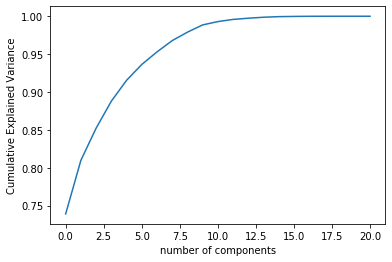

In [68]:
#Graph to analyze PCA Component variation    
pca= PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [69]:
#PCA Component transform  
pca=PCA(n_components=12)
X_transform=pca.fit_transform(X_std)
print("Percntage of Information covered by each PC")
print(pca.explained_variance_ratio_)

Percntage of Information covered by each PC
[0.73893429 0.07077606 0.04240185 0.03570724 0.02753855 0.02090449
 0.01661074 0.01494461 0.01113274 0.00959889 0.00439011 0.0028611 ]


In [70]:
df1=pd.DataFrame(data=X_transform[0:,0:],index=[i for i in range(X_transform.shape[0])], columns=['PC'+str(i+1) for i in range(X_transform.shape[1])])
print("Extracted Features")
print(df1)

Extracted Features
           PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0    -2.948911  17.501106 -7.963808  8.530774 -2.656325  0.225602  0.496605   
1    -2.879124  10.098704 -3.641106  3.561448 -0.947970 -0.006373  0.071807   
2    -1.105774  -0.294357  0.020353  0.005319 -0.161249 -0.009961  0.214819   
3    -1.197124  -0.503728  0.473256  0.492988 -0.590335  0.565711  0.173447   
4    -0.723899  -0.462534  0.440958  0.403560 -0.715395  0.932405  0.355266   
5    -0.723899  -0.462534  0.440958  0.403560 -0.715395  0.932405  0.355266   
6    -2.628178   1.589946  0.416542 -1.053439  0.493506 -0.048804 -0.145632   
7    -1.955549   0.034872  0.318256 -0.053196  0.037875  0.002996 -0.076538   
8     0.054883  -0.332064  0.105105  0.277912  0.513887  0.920794  0.495987   
9     1.807580  -0.449056 -0.392798  0.012600  0.133727  0.598526 -0.090363   
10    0.590390  -0.577257 -0.085525  0.536606  0.314779  0.785929 -0.042551   
11   -1.838999  -0.160383  0.3158

In [71]:
print (df1.shape)

(498, 12)


In [72]:
df2=pd.DataFrame(df1)

In [73]:
df2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-2.948911,17.501106,-7.963808,8.530774,-2.656325,0.225602,0.496605,-1.117753,-0.069579,-1.018651,0.051099,0.010503
1,-2.879124,10.098704,-3.641106,3.561448,-0.947970,-0.006373,0.071807,-0.138203,0.029361,0.005382,0.028777,0.003819
2,-1.105774,-0.294357,0.020353,0.005319,-0.161249,-0.009961,0.214819,-0.414223,-0.339881,0.002532,0.037105,-0.246344
3,-1.197124,-0.503728,0.473256,0.492988,-0.590335,0.565711,0.173447,0.093288,-0.250339,-0.191152,-0.140292,-0.076293
4,-0.723899,-0.462534,0.440958,0.403560,-0.715395,0.932405,0.355266,0.392258,-0.347211,-0.249248,-0.059443,-0.182372
5,-0.723899,-0.462534,0.440958,0.403560,-0.715395,0.932405,0.355266,0.392258,-0.347211,-0.249248,-0.059443,-0.182372
6,-2.628178,1.589946,0.416542,-1.053439,0.493506,-0.048804,-0.145632,0.443336,-0.044414,0.547285,-0.035606,-0.033216
7,-1.955549,0.034872,0.318256,-0.053196,0.037875,0.002996,-0.076538,-0.207021,-0.237467,-0.232356,0.024602,0.003500
8,0.054883,-0.332064,0.105105,0.277912,0.513887,0.920794,0.495987,-0.217238,0.241065,-0.329812,-0.251535,0.416093
9,1.807580,-0.449056,-0.392798,0.012600,0.133727,0.598526,-0.090363,-0.230765,0.493745,-0.038156,1.324106,-0.697433


In [74]:
from sklearn.metrics import roc_auc_score, f1_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [75]:
clf=RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [76]:
X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(df2,y,test_size=0.2,random_state=101,stratify=y)
clf.fit(X_new_train, y_new_train)
y_pred = clf.predict(X_new_test)
print(classification_report(y_new_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.96      0.93        90
        True       0.33      0.20      0.25        10

    accuracy                           0.88       100
   macro avg       0.62      0.58      0.59       100
weighted avg       0.86      0.88      0.87       100



In [77]:
import array as arr

In [78]:
f1_mean_array = arr.array('d',[])

In [79]:
for x in range(10):
    scores = cross_val_score(clf, df2, y, cv=10, n_jobs=-1, scoring='f1_macro')
    f1_mean_array.append(scores.mean())


In [80]:
f1_mean_array

array('d', [0.5114702517162473, 0.5127088426955008, 0.5038498113326646, 0.5144828692766802, 0.5014802979816825, 0.5197827459340961, 0.5109103413019135, 0.500241707002429, 0.513828663524168, 0.5174011914989348])

In [81]:
sum = 0
for x in f1_mean_array:
    sum = sum + x
print (sum)

5.106156722264316


In [82]:
final_f1_score = sum/10
final_f1_score

0.5106156722264317

In [87]:
roc_mean_array = arr.array('d',[])

In [88]:
for x in range(10):
    scores_2 = cross_val_score(clf, df2, y, cv=10, n_jobs=-1, scoring='roc_auc')
    roc_mean_array.append(scores_2.mean())

In [89]:
roc_mean_array

array('d', [0.7918573232323232, 0.7862310606060607, 0.7835984848484848, 0.7855252525252524, 0.8011426767676768, 0.7982285353535354, 0.7867714646464647, 0.7917588383838383, 0.8014494949494949, 0.7794103535353536])

In [90]:
sum = 0
for x in roc_mean_array:
    sum = sum + x
print (sum)

7.905973484848485


In [91]:
final_roc_score = sum/10
final_roc_score

0.7905973484848485